In [1]:
import pandas as pd
import numpy as np 

# Data preparation Agricultural Waste

## Loading data

In [2]:
fao_data = pd.read_csv('data/Bioenergy_production_from_FAO.csv')
fao_data_add=pd.read_csv('data/biomass_production_FAO_5_countries.csv')

In [3]:
fao_data_add['Area'].unique()

array(['Iceland', 'Malta', 'Norway', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype=object)

In [4]:
#adding data of countries missing from original data
fao_data = pd.concat([fao_data,fao_data_add],ignore_index=True)

## Mapping country codes

Mapping country names with NUTS regional codes

In [5]:
# Changing country names to be compatible with names in mapping file
fao_data.rename(columns={'Area':'Country'},inplace=True)
fao_data.loc[fao_data['Country']=='Netherlands (Kingdom of the)','Country']='Netherlands'
fao_data.loc[fao_data['Country']=='Czechia','Country']='Czech Republic'
fao_data.loc[fao_data['Country']=='United Kingdom of Great Britain and Northern Ireland','Country']='United Kingdom'

In [6]:
# update path of file if necessary
country_code = pd.read_csv("data/country_codes.csv")

fao_data = pd.merge(fao_data, country_code[['Country','NUTS_code']],how='left', on='Country')
fao_data.rename(columns={'NUTS_code':'LOCATION'},inplace = True)

## Extracting data for fuel wood and agricultural waste 

In [7]:
wood = 'Fuelwood'
agri_waste = ['Animal waste', 'Other vegetal material and residues']
fao_data=fao_data.loc[fao_data['Item'].isin(agri_waste+[wood])]

In [8]:
fao_data.drop(columns =['Domain Code','Element Code','Year Code','Area Code (M49)','Item Code','Flag','Flag Description'],inplace = True)

In [10]:
#Not aggregating anymore
#agri_waste_rows = fao_data[fao_data['Item'].isin(agri_waste)]

#agri_waste_summary = (agri_waste_rows.groupby(['Country', 'Year'], as_index=False)
#    .agg({'Value': 'sum',
#        'Domain':'first', 
#        'Element':'first', 
#        'Unit':'first' ,
#        'LOCATION':'first'})
#)

# Add the 'Item' column as 'Agricultural waste'
#agri_waste_summary['Item'] = 'Agricultural waste'

# Append the new rows to the original dataframe
#fao_data = pd.concat([fao_data, agri_waste_summary], ignore_index=True)


## Merging with population and GDP

In [10]:
# update path of file if necessary
pop = pd.read_csv("/Users/marriyapillais/Desktop/msw_model/FutuRaM_MSWI/data/processed/population_projections_cleaned.csv")
pop_his=pop.loc[pop["TIME"].isin(range(2010,2023))]

In [11]:
fao_data = pd.merge(fao_data,pop[["LOCATION",'TIME','POP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
fao_data.drop(columns = ['Country','TIME'], inplace = True)

In [12]:
# update path of file if necessary
gdp = pd.read_csv("/Users/marriyapillais/Desktop/msw_model/FutuRaM_MSWI/data/processed/gdp_percap_projections_cleaned.csv")
gdp_his=gdp.loc[gdp["TIME"].isin(range(2010,2023))]

In [13]:
fao_data = pd.merge(fao_data,gdp[["LOCATION",'TIME','GDPVD_CAP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
fao_data.drop(columns = ['TIME'], inplace = True)

## Storing relevant data

In [14]:
# Selecting years relevant for FutuRaM
fao_data = fao_data.loc[fao_data['Year']>=2010]

In [15]:
# Selecting (aggregated) items relevant for FutuRaM
fao_data = fao_data.loc[(fao_data['Item']==wood)|(fao_data['Item'].isin(agri_waste))]

In [16]:
fao_data.reset_index(drop=True,inplace=True)

In [17]:
fao_data_wood = fao_data.loc[fao_data['Item']==wood]
fao_data_agri = fao_data.loc[fao_data['Item'].isin(agri_waste)]

# Data Preparation Wood

In [18]:
forestry_data = pd.read_excel('data/wood_forestry_data.xlsx')

In [19]:
wood_items = forestry_data['Item'].unique()

## Mapping country codes

In [20]:
# Changing country names to be compatible with names in mapping file
forestry_data.rename(columns={'Area':'Country'},inplace=True)
forestry_data.loc[forestry_data['Country']=='Netherlands (Kingdom of the)','Country']='Netherlands'
forestry_data.loc[forestry_data['Country']=='Czechia','Country']='Czech Republic'
forestry_data.loc[forestry_data['Country']=='United Kingdom of Great Britain and Northern Ireland','Country']='United Kingdom'

In [21]:
forestry_data = pd.merge(forestry_data, country_code[['Country','NUTS_code']],how='left', on='Country')
forestry_data.rename(columns={'NUTS_code':'LOCATION'},inplace = True)

## Selecting data from 2010

In [22]:
forestry_data = forestry_data[forestry_data['Year']>=2010]

## Merging GDP and POP

In [23]:
forestry_data = pd.merge(forestry_data,pop[["LOCATION",'TIME','POP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
forestry_data.drop(columns = ['Country','TIME'], inplace = True)

In [24]:
forestry_data = pd.merge(forestry_data,gdp[["LOCATION",'TIME','GDPVD_CAP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
forestry_data.drop(columns = ['TIME'], inplace = True)

# Data preparation Paper

In [25]:
paper_data = pd.read_excel('data/paper_data.xlsx')

## Mapping codes

In [26]:
# Changing country names to be compatible with names in mapping file
paper_data.rename(columns={'Area':'Country'},inplace=True)
paper_data.loc[paper_data['Country']=='Netherlands (Kingdom of the)','Country']='Netherlands'
paper_data.loc[paper_data['Country']=='Czechia','Country']='Czech Republic'
paper_data.loc[paper_data['Country']=='United Kingdom of Great Britain and Northern Ireland','Country']='United Kingdom'

In [27]:
paper_data = pd.merge(paper_data, country_code[['Country','NUTS_code']],how='left', on='Country')
paper_data.rename(columns={'NUTS_code':'LOCATION'},inplace = True)

## Merging GDP and POP

In [28]:
paper_data = pd.merge(paper_data,pop[["LOCATION",'TIME','POP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
paper_data.drop(columns = ['Country','TIME'], inplace = True)

In [29]:
paper_data = pd.merge(paper_data,gdp[["LOCATION",'TIME','GDPVD_CAP']], how = 'left',left_on=['Year','LOCATION'],right_on=['TIME','LOCATION'])
paper_data.drop(columns = ['TIME'], inplace = True)

## Selecting data from 2010

In [30]:
paper_data = paper_data[paper_data['Year']>=2010]

In [33]:
paper_data.reset_index(drop=True, inplace=True)

# Fitting data and getting BAU values

## Fit function

In [37]:
def fit_fun(x,fit,deg=1):
    #for the specified parameters, this function returns the value from the fit  
    if deg==2:
        y = fit[2]+fit[1]*x+fit[0]*x*x
    elif deg==1:
        y = fit[1]+fit[0]*x
    return(y)

In [38]:
def projections(pop_data,fuel_wood_data, fit, base_year, proj_year):
    proxy_base = fit_fun(pop_data.loc[pop_data['TIME']==base_year]['POP'], fit).to_numpy()
    actual_base = fuel_wood_data.loc[fuel_wood_data['Year']==base_year]['Value'].to_numpy()
    if type(proj_year) == int:
        proxies = fit_fun(pop_data.loc[pop_data['TIME']==proj_year]['POP'], fit)
    else:
        proxies = fit_fun(pop_data.loc[pop_data['TIME'].isin(proj_year)]['POP'], fit)
    projections = proxies /proxy_base * actual_base
    return(projections)

base_year = 2022

## Logistic Function

In [39]:
from scipy.optimize import minimize, curve_fit, show_options
from functools import partial

In [40]:
# Logistic Function
def logistic_fun(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

In [41]:
# Objective function that needs to be minimised
def objective(params, years, obs):
    calculated = logistic_fun(years, params[0],params[1],params[2])
    difference = np.sum((calculated - obs)**2)
    return difference

In [42]:
# Function for calculating prediction with the given params, years
def prediction(params, years):
    return logistic_fun(years, params[0], params[1], params[2])

In [43]:
# Constraint for minimization
def con_1(params, years):
    #constraint: prediction>0
    return (logistic_fun(years,params[0], params[1], params[2]))

years = np.arange(2010,2051)

cons = [{'type': 'ineq', 'fun': partial(con_1, years=years)}
            ]

# Bounds for minimization
bounds = [(-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf)]


# Plots

In [44]:
import matplotlib.pyplot as plt

## Country-wise plots

Fitting country-wise data to obtain BAU projections

### Fuelwood

Time-series-based projections for fuel wood

In [293]:
wood_items

array(['Recovered paper', 'Wood residues', 'Wood chips and particles',
       'Wood charcoal', 'Wood briquettes and other agglomerates',
       'Wood pellets', 'Recovered post-consumer wood',
       'Wood fuel, coniferous', 'Wood fuel, non-coniferous'], dtype=object)

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/2839137020.py:24: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/3812807252.py:3: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


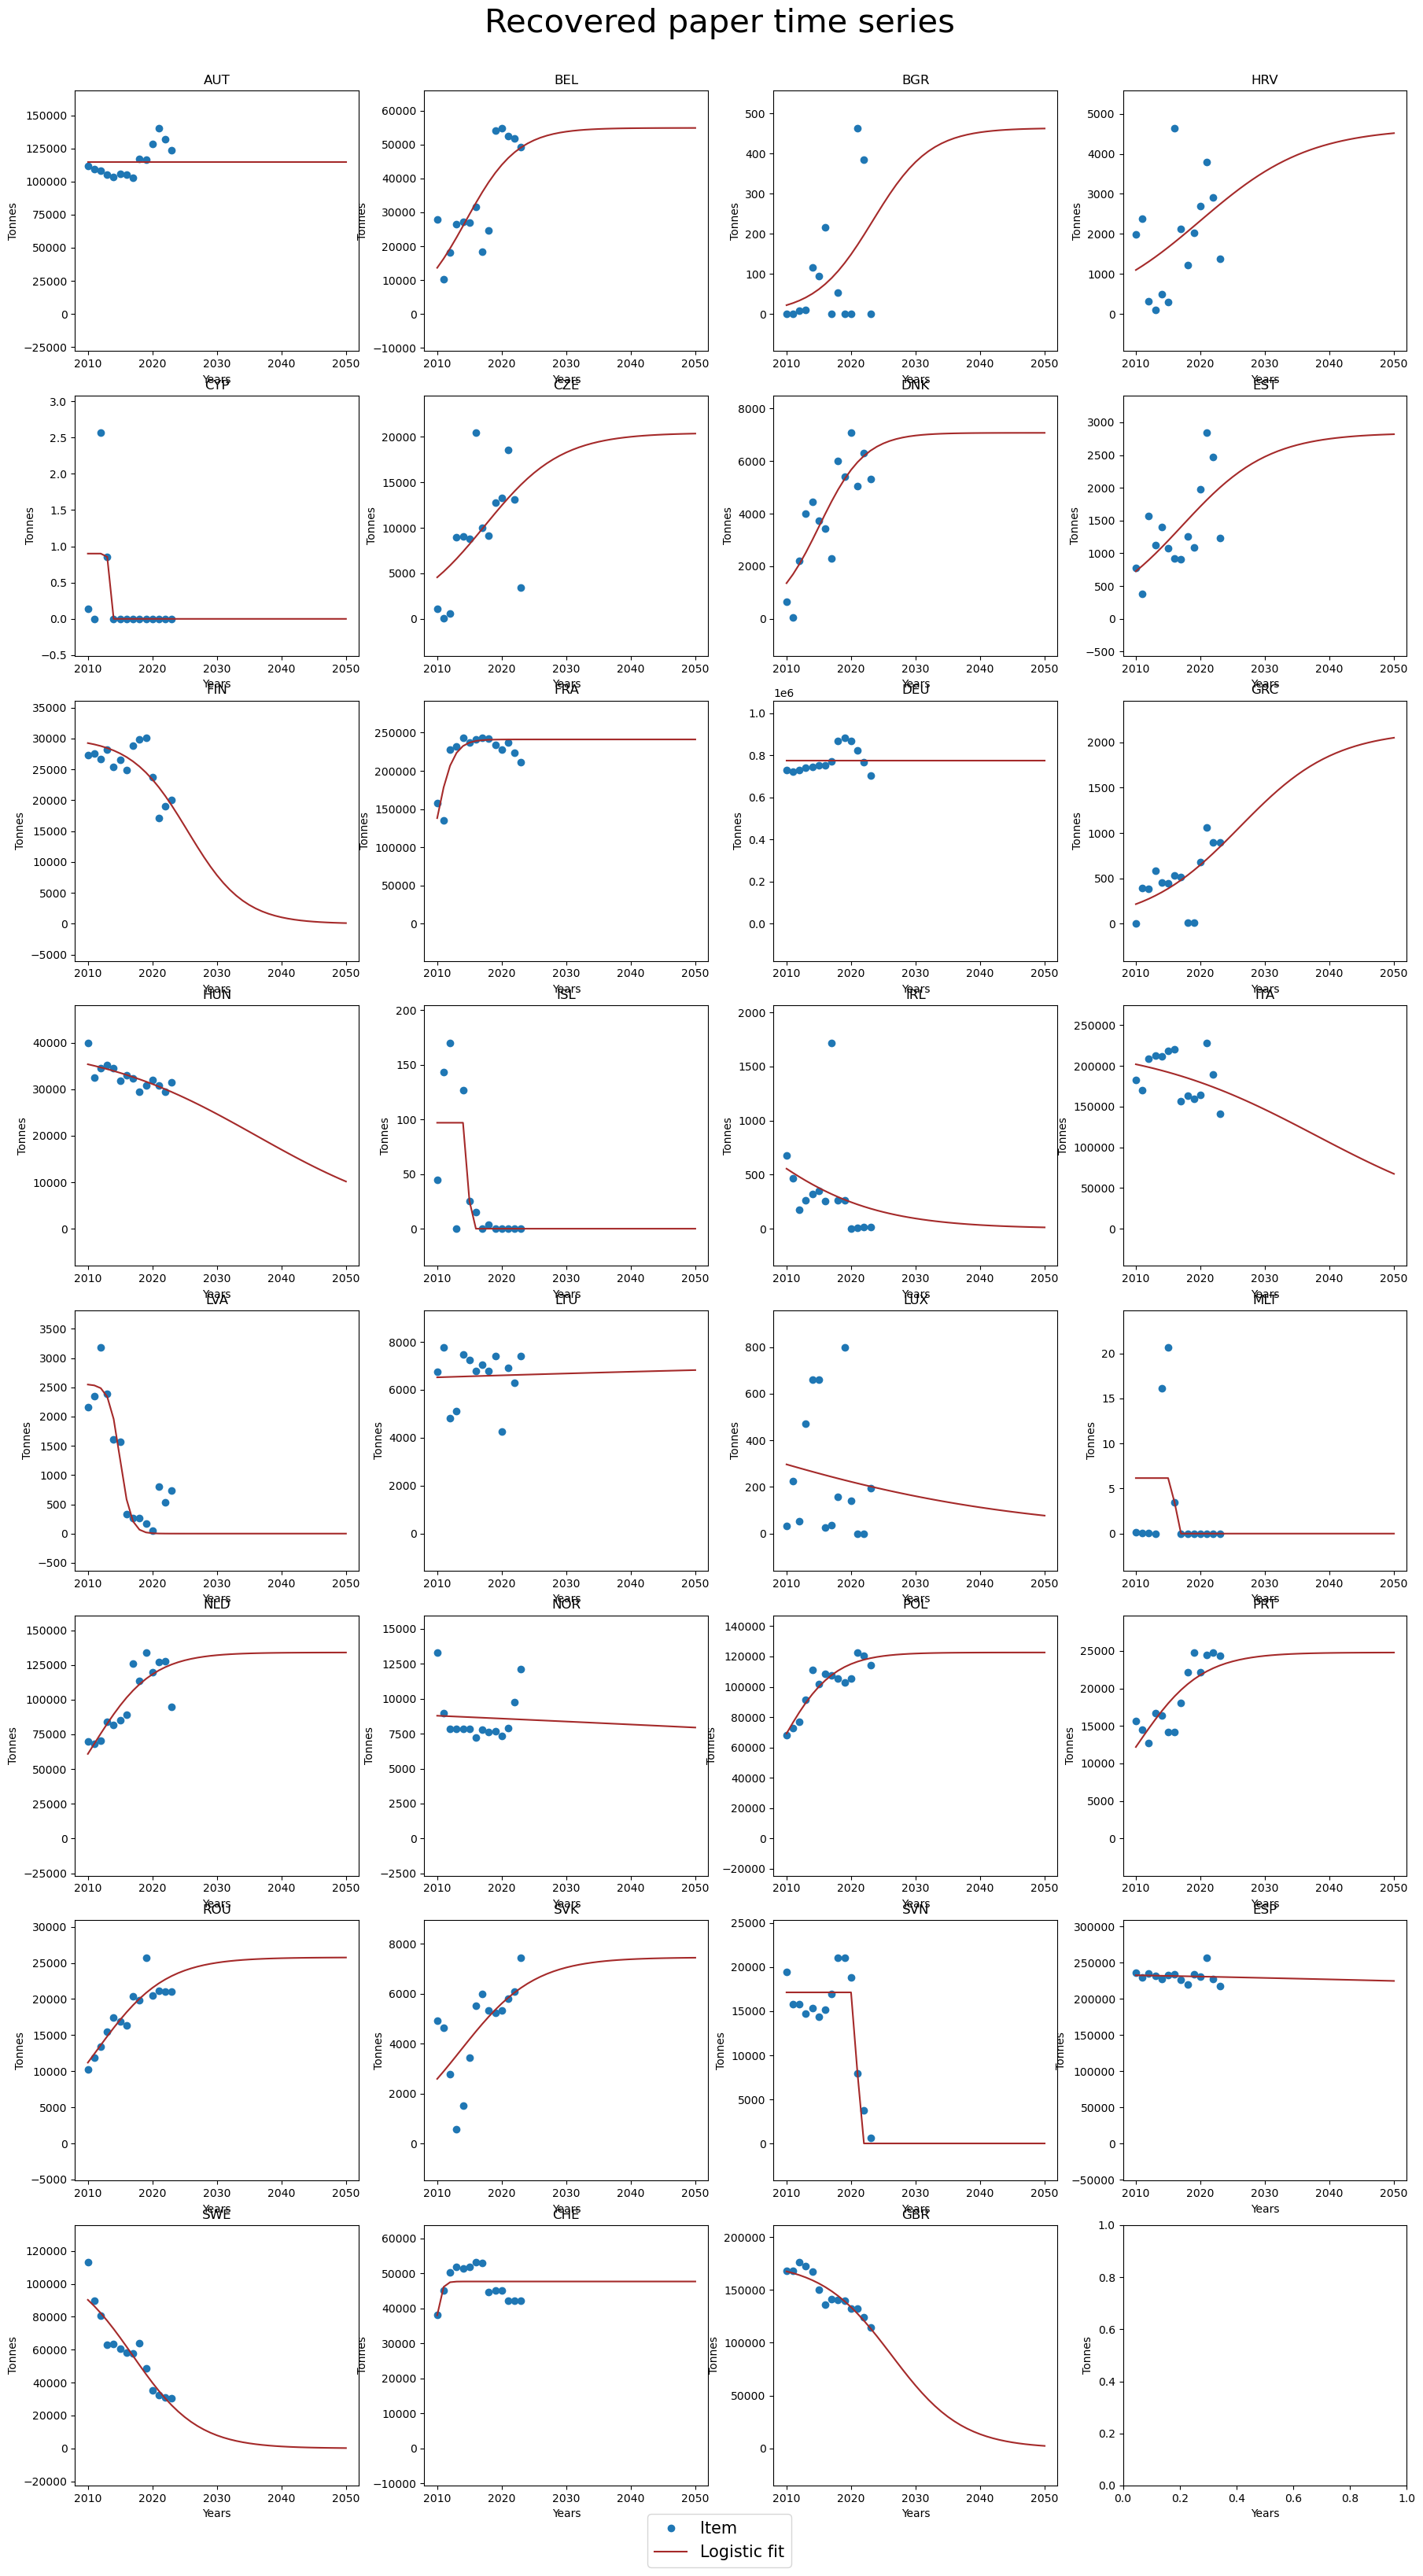

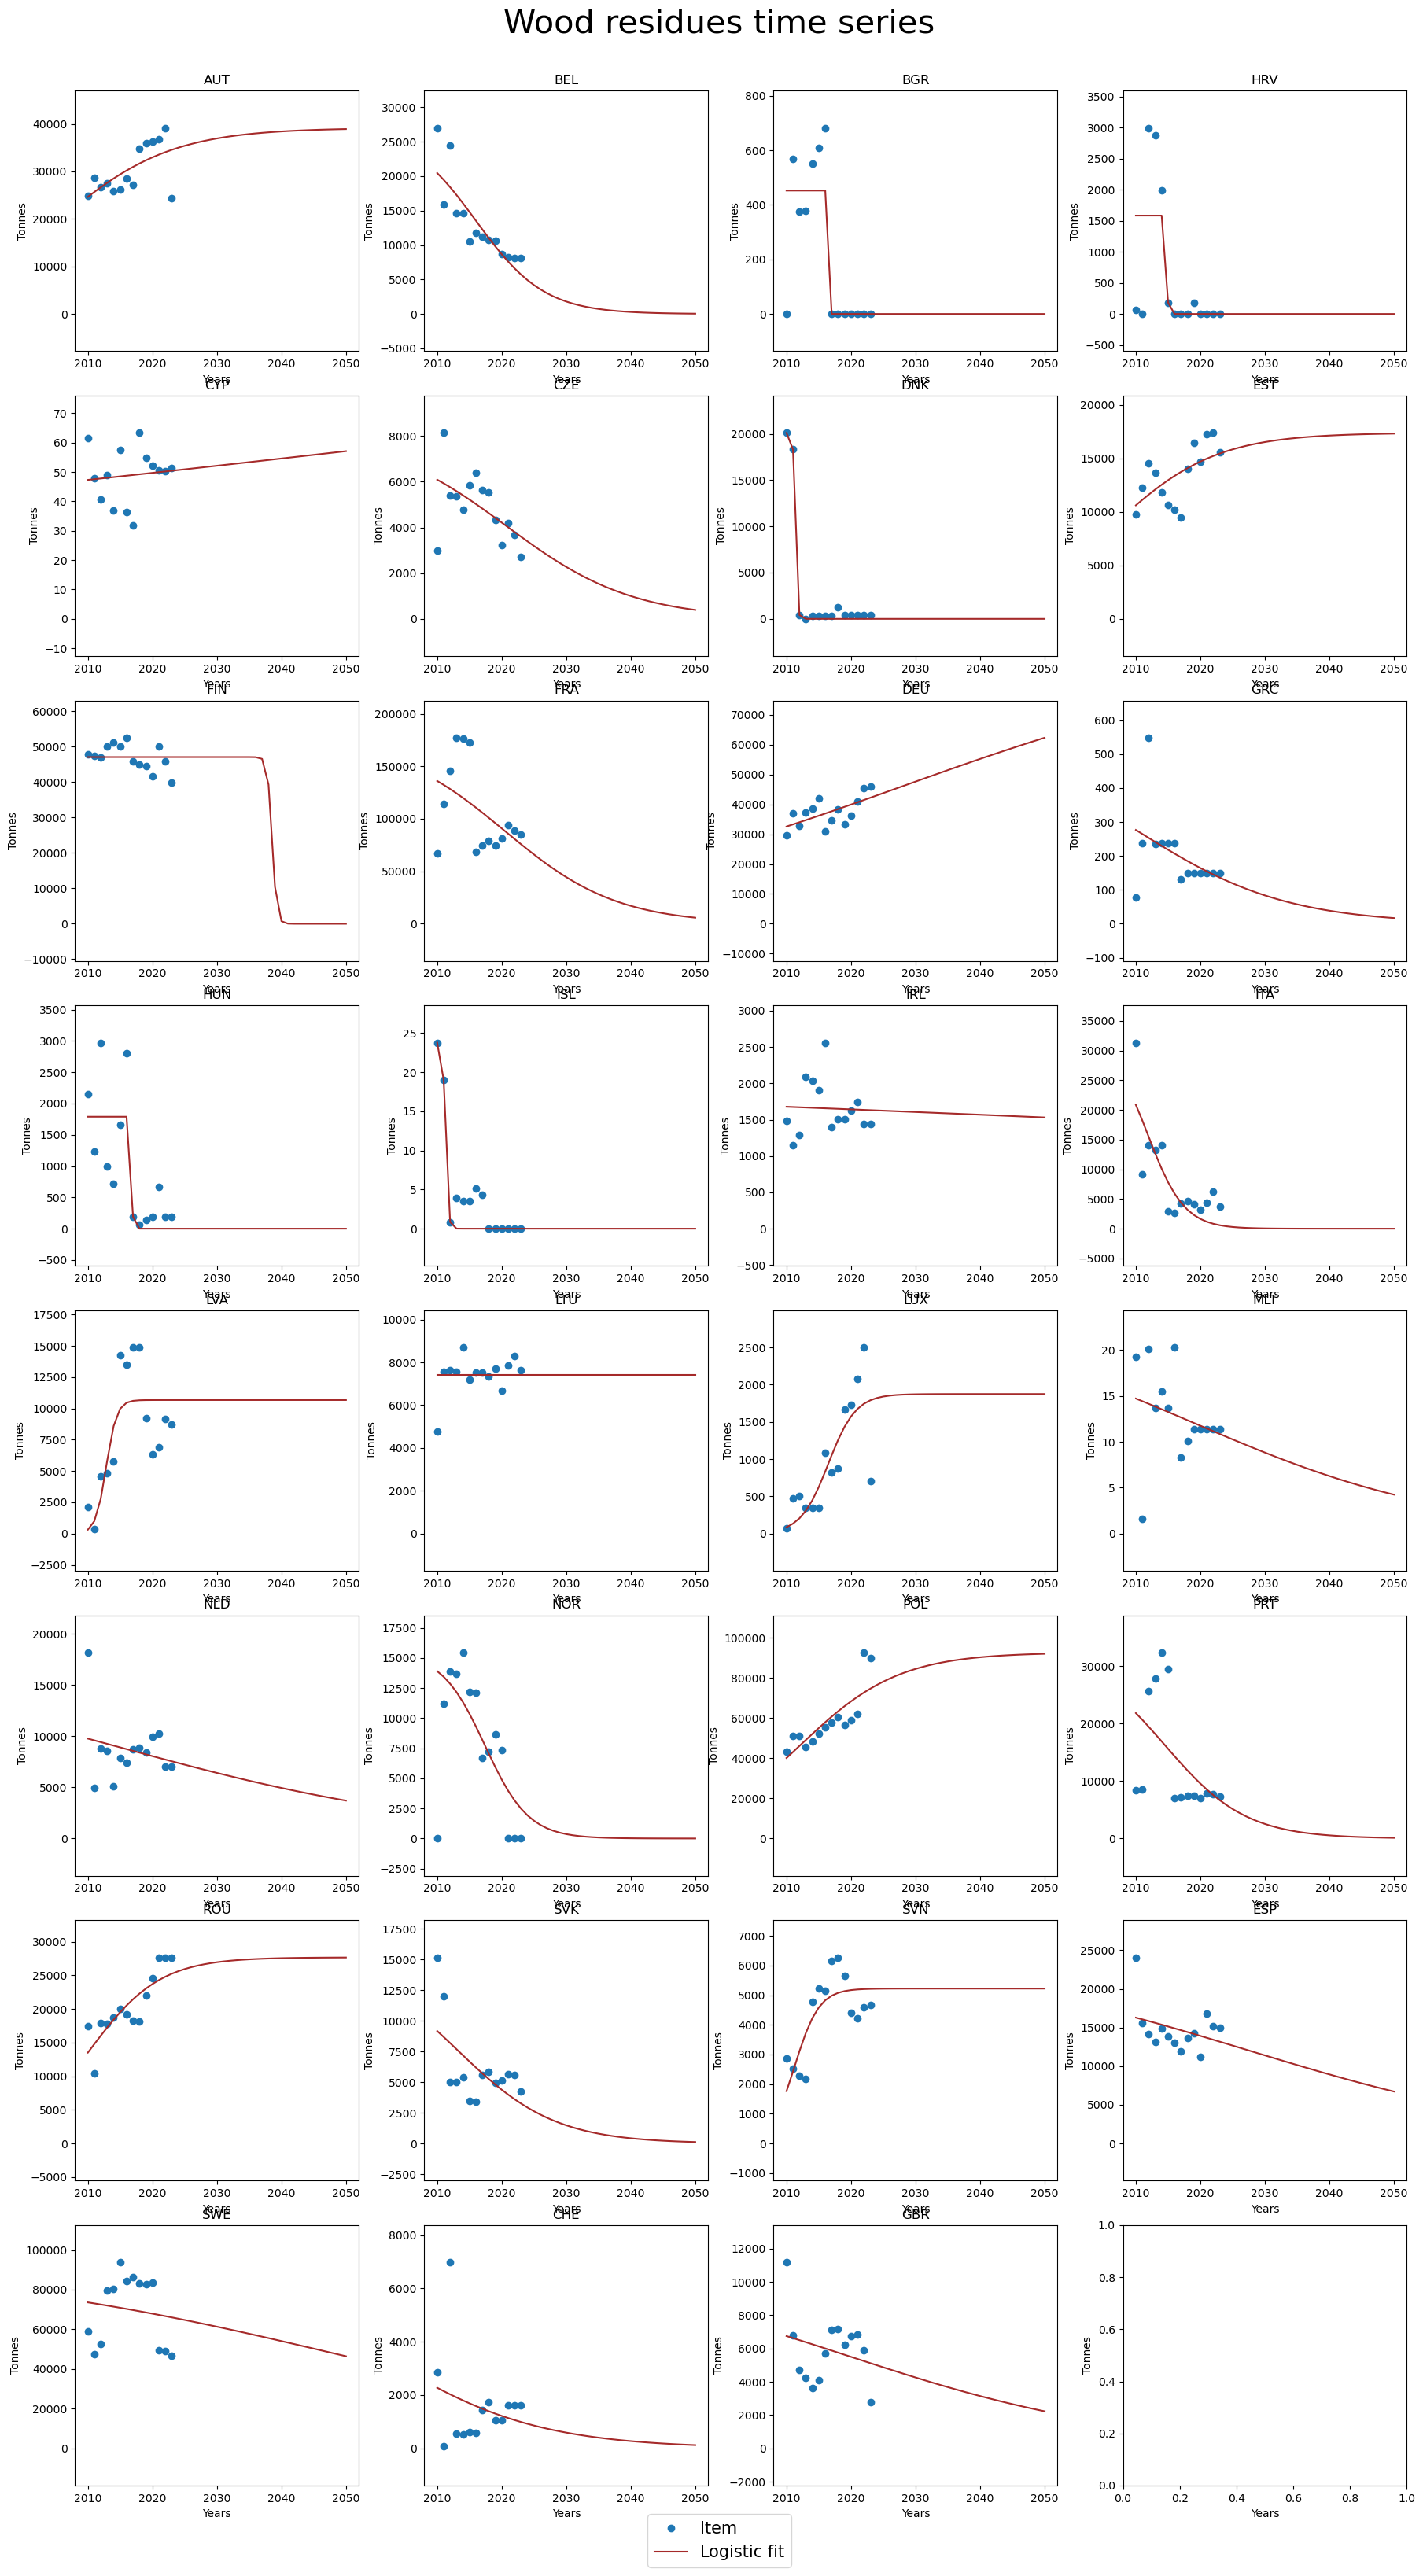

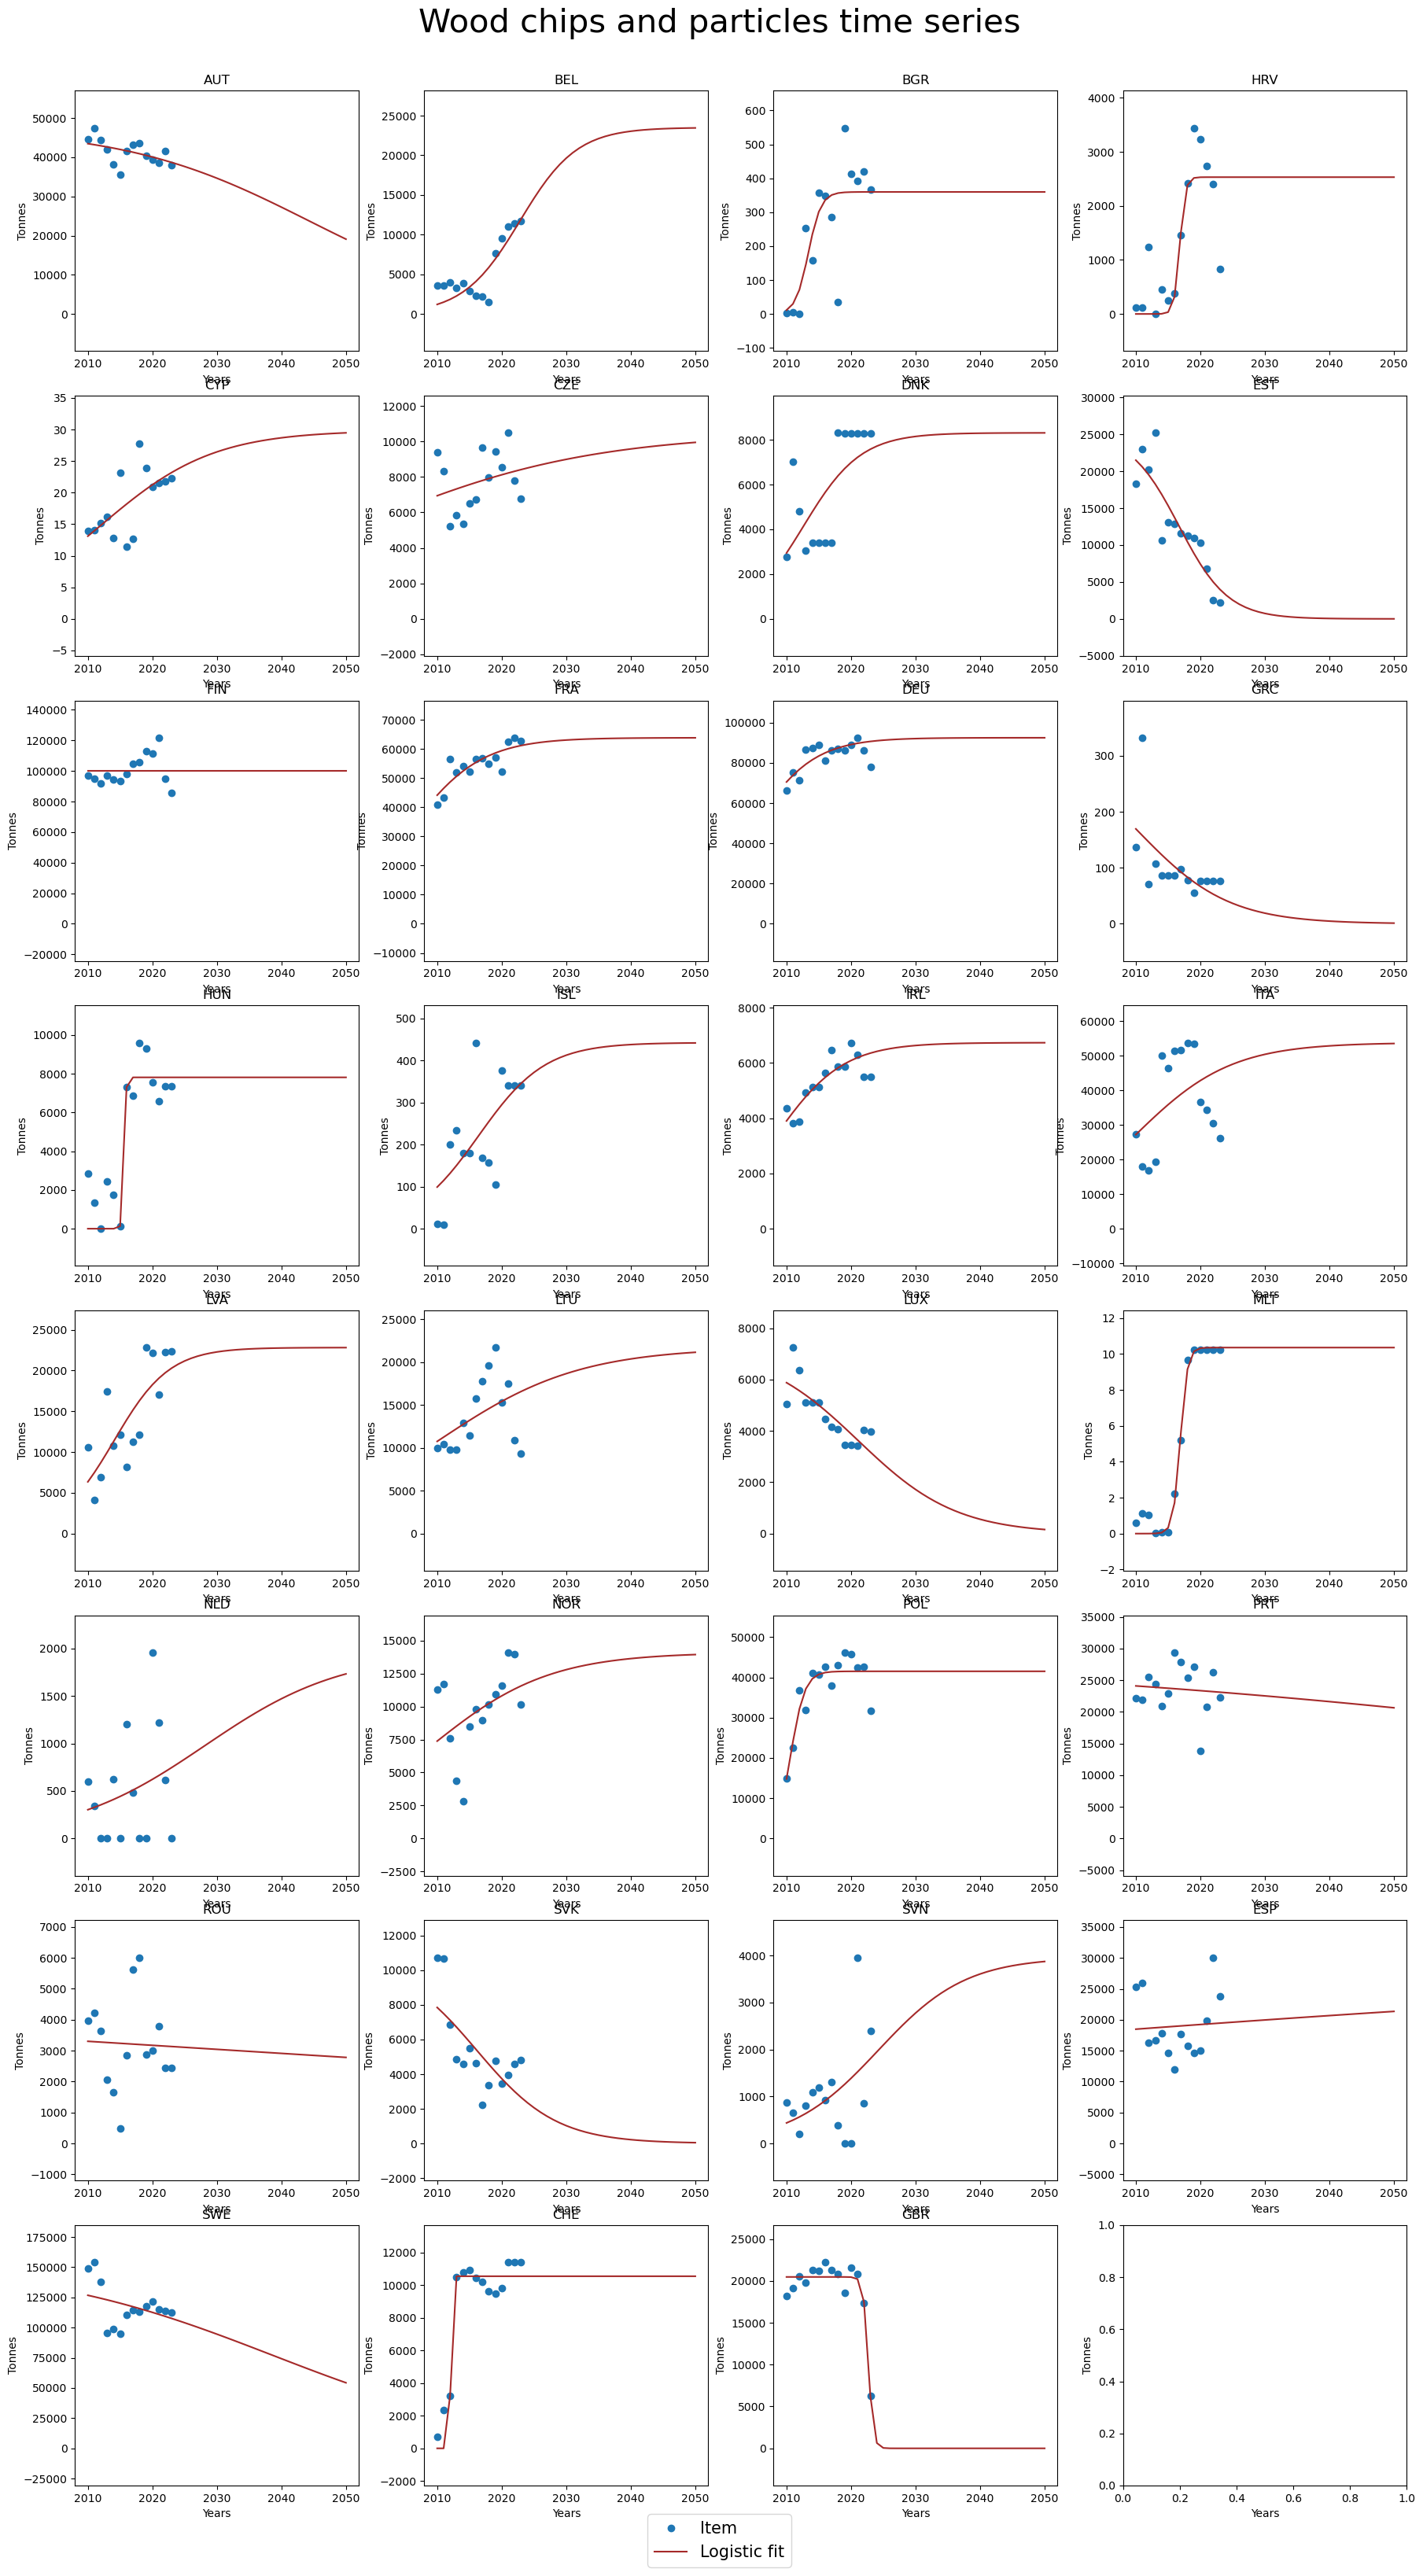

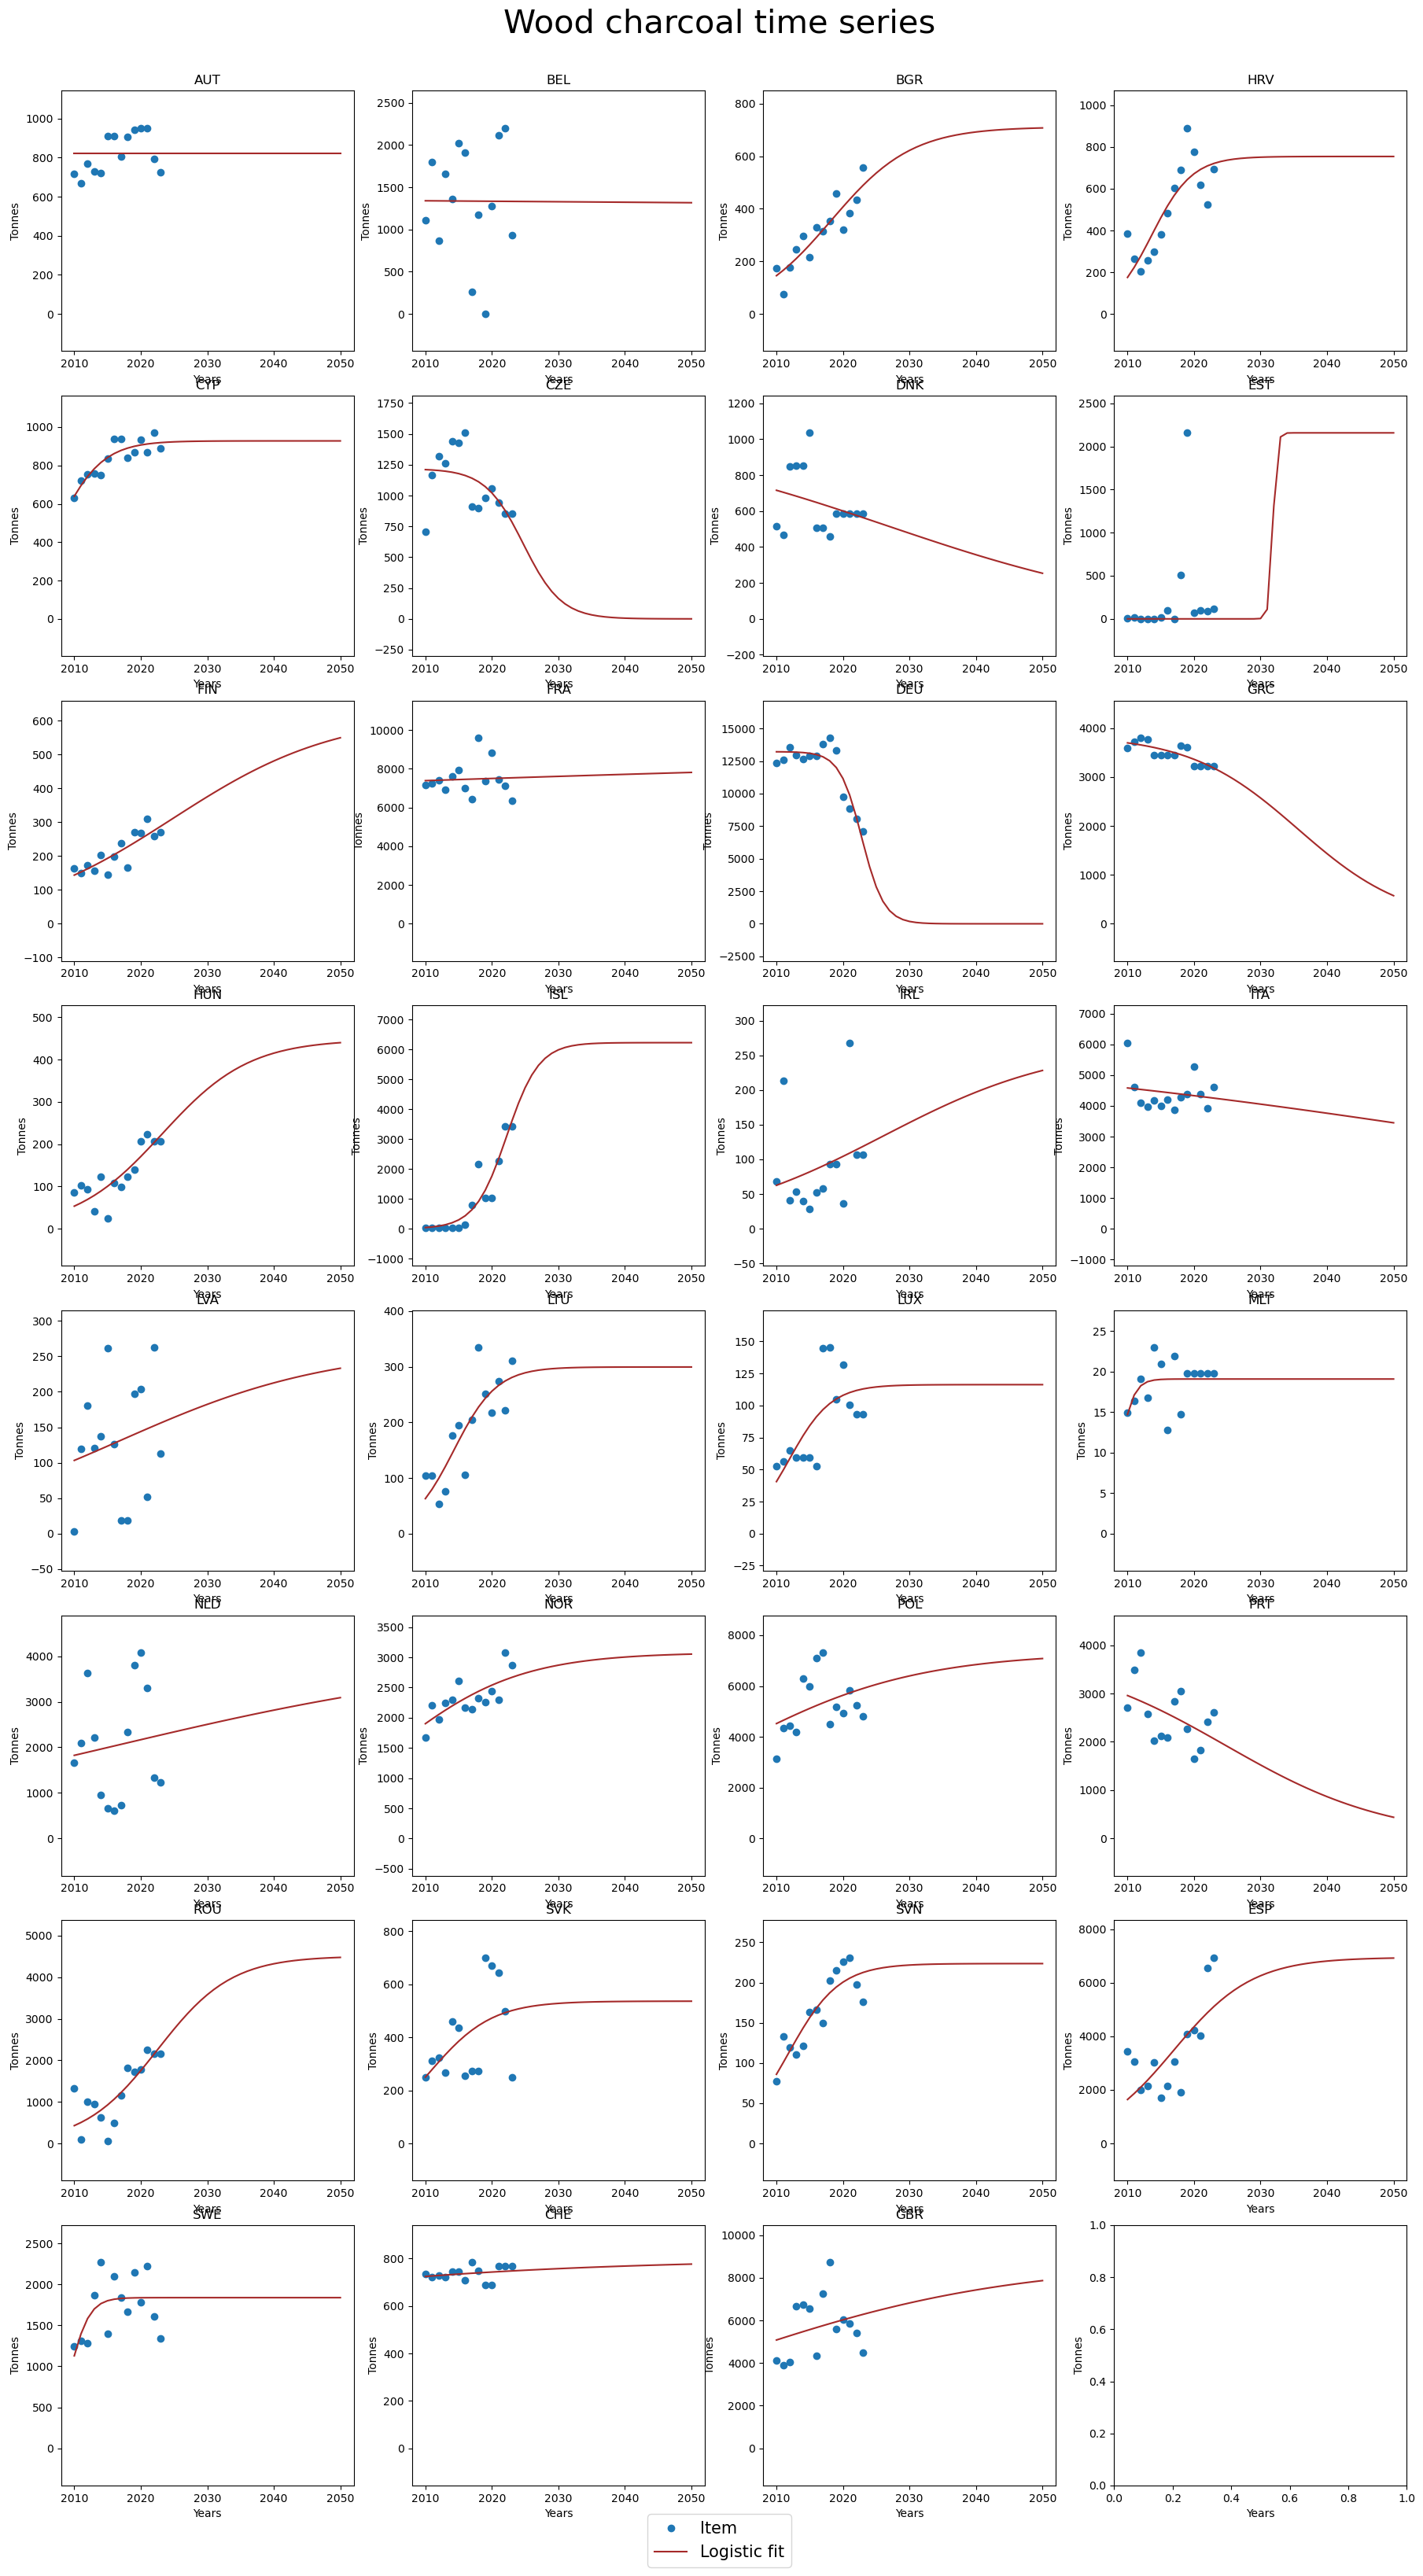

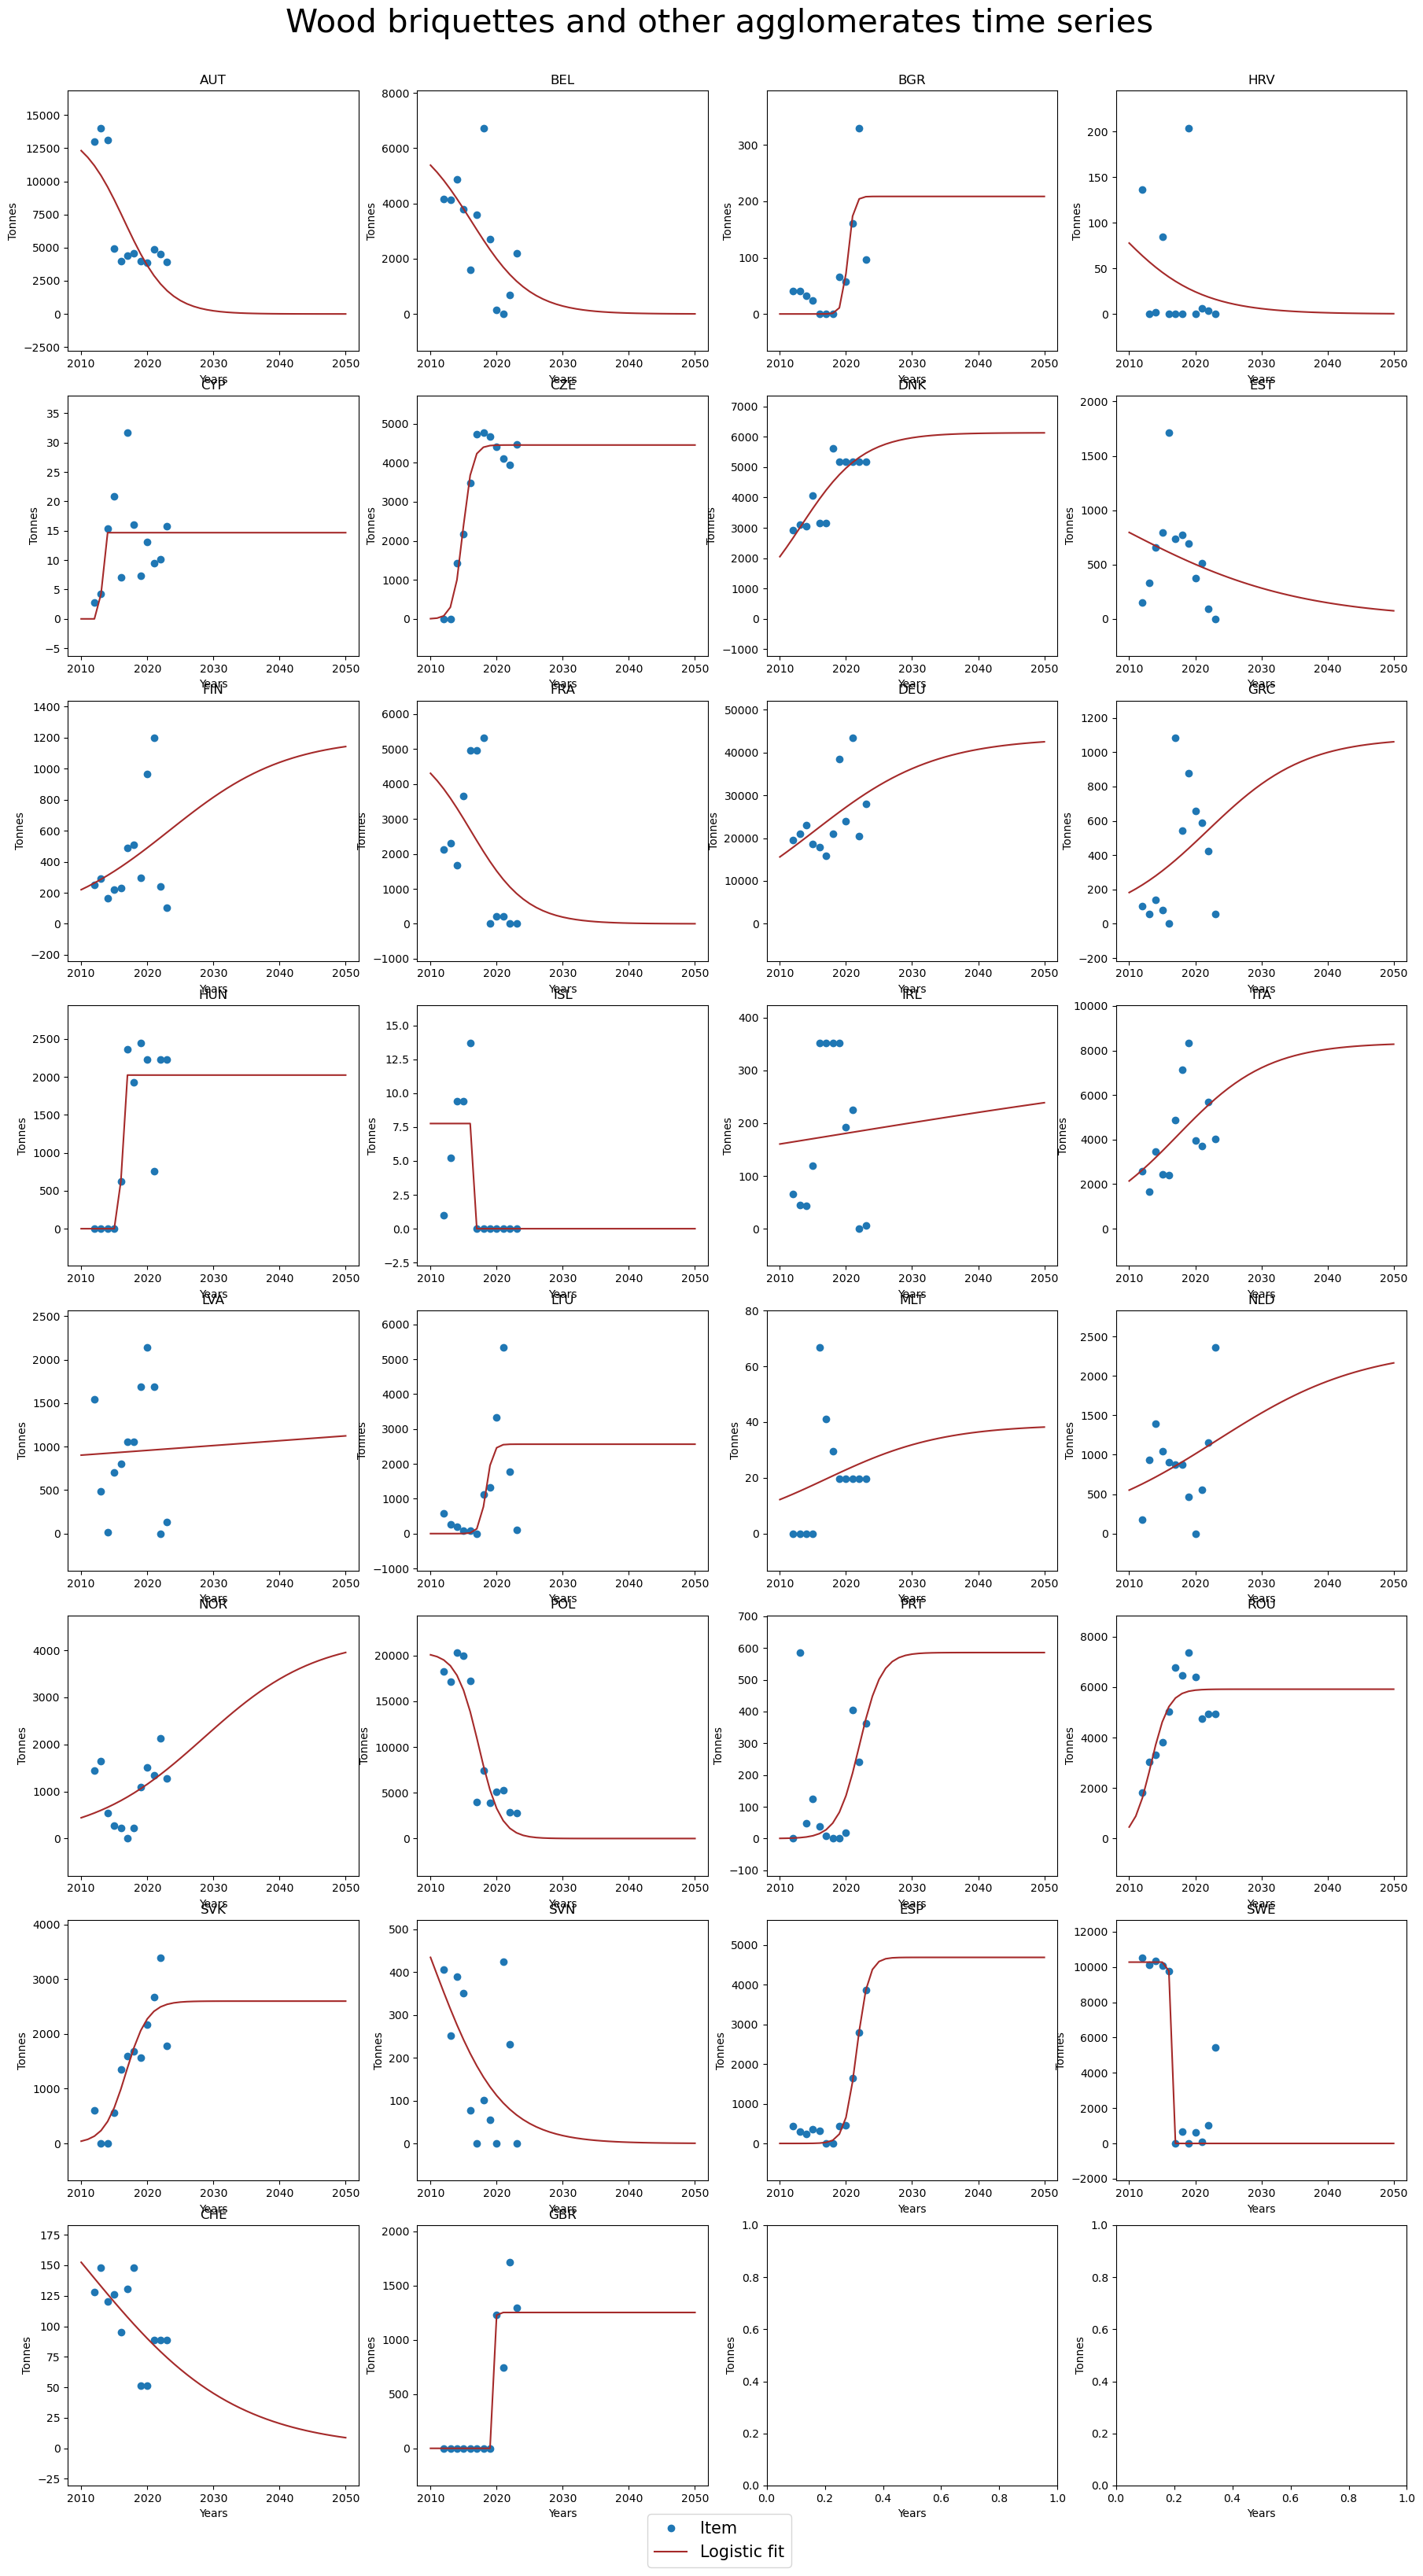

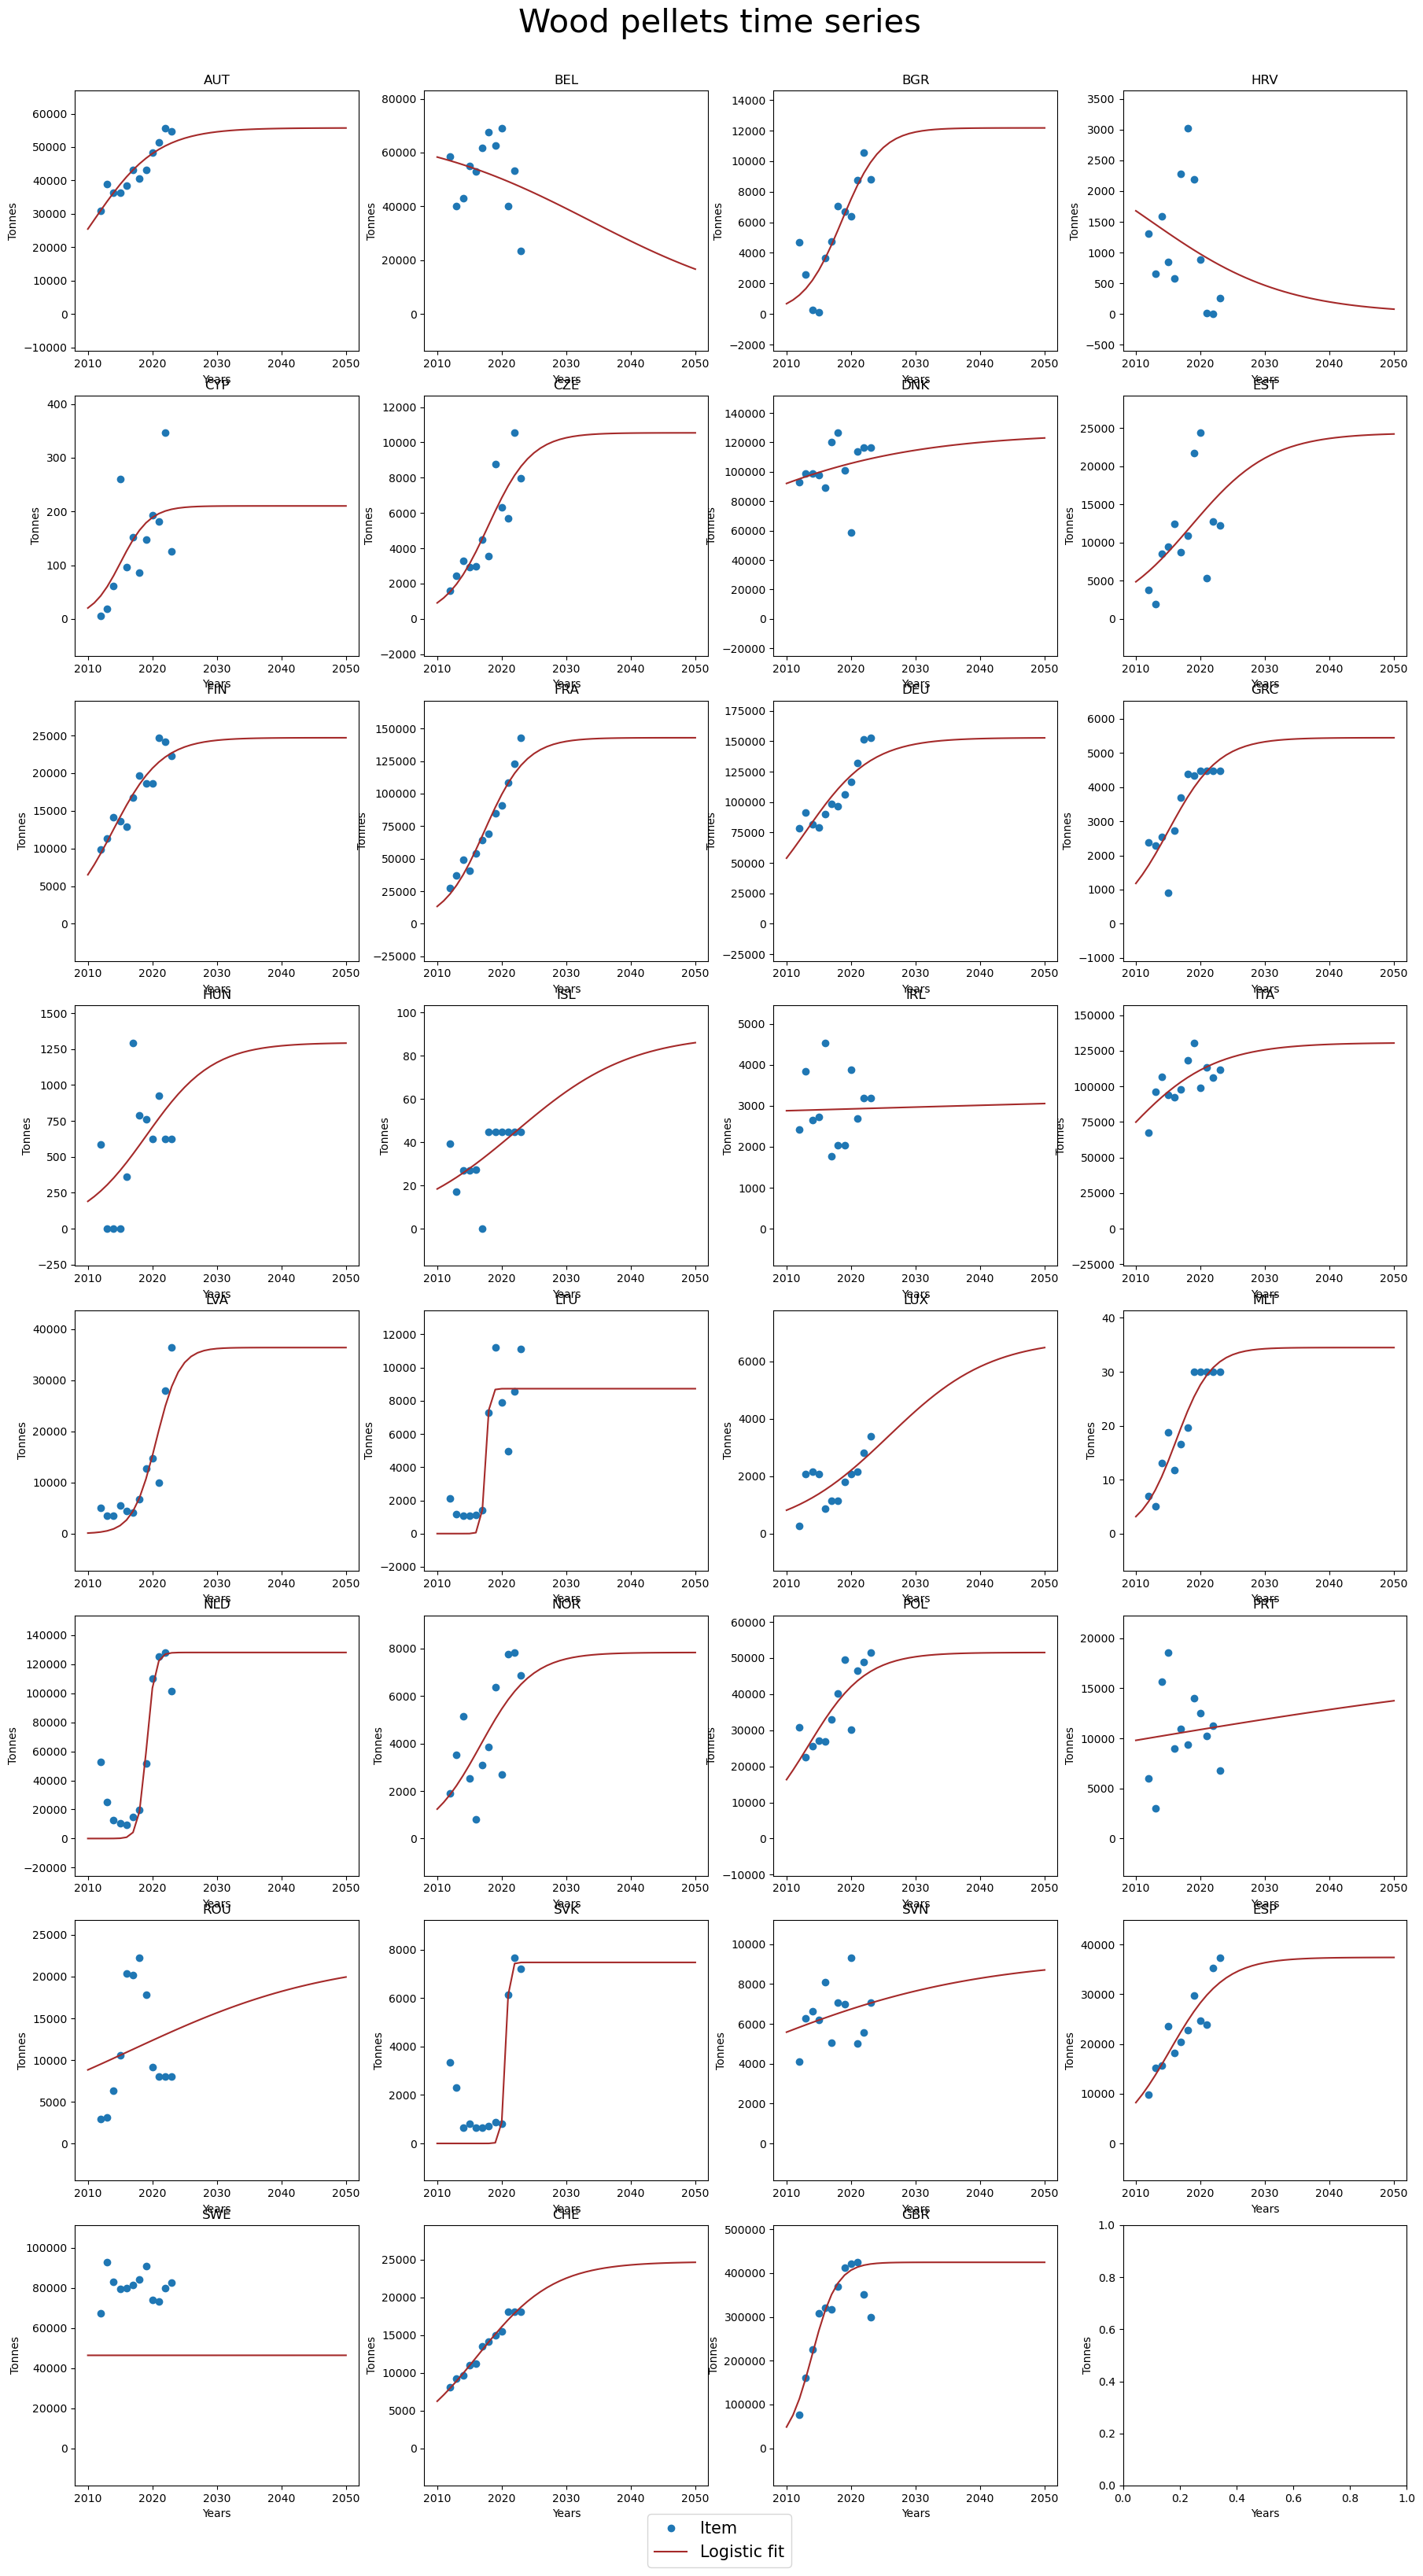

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/2839137020.py:35: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(y_min - padding, y_max + padding)


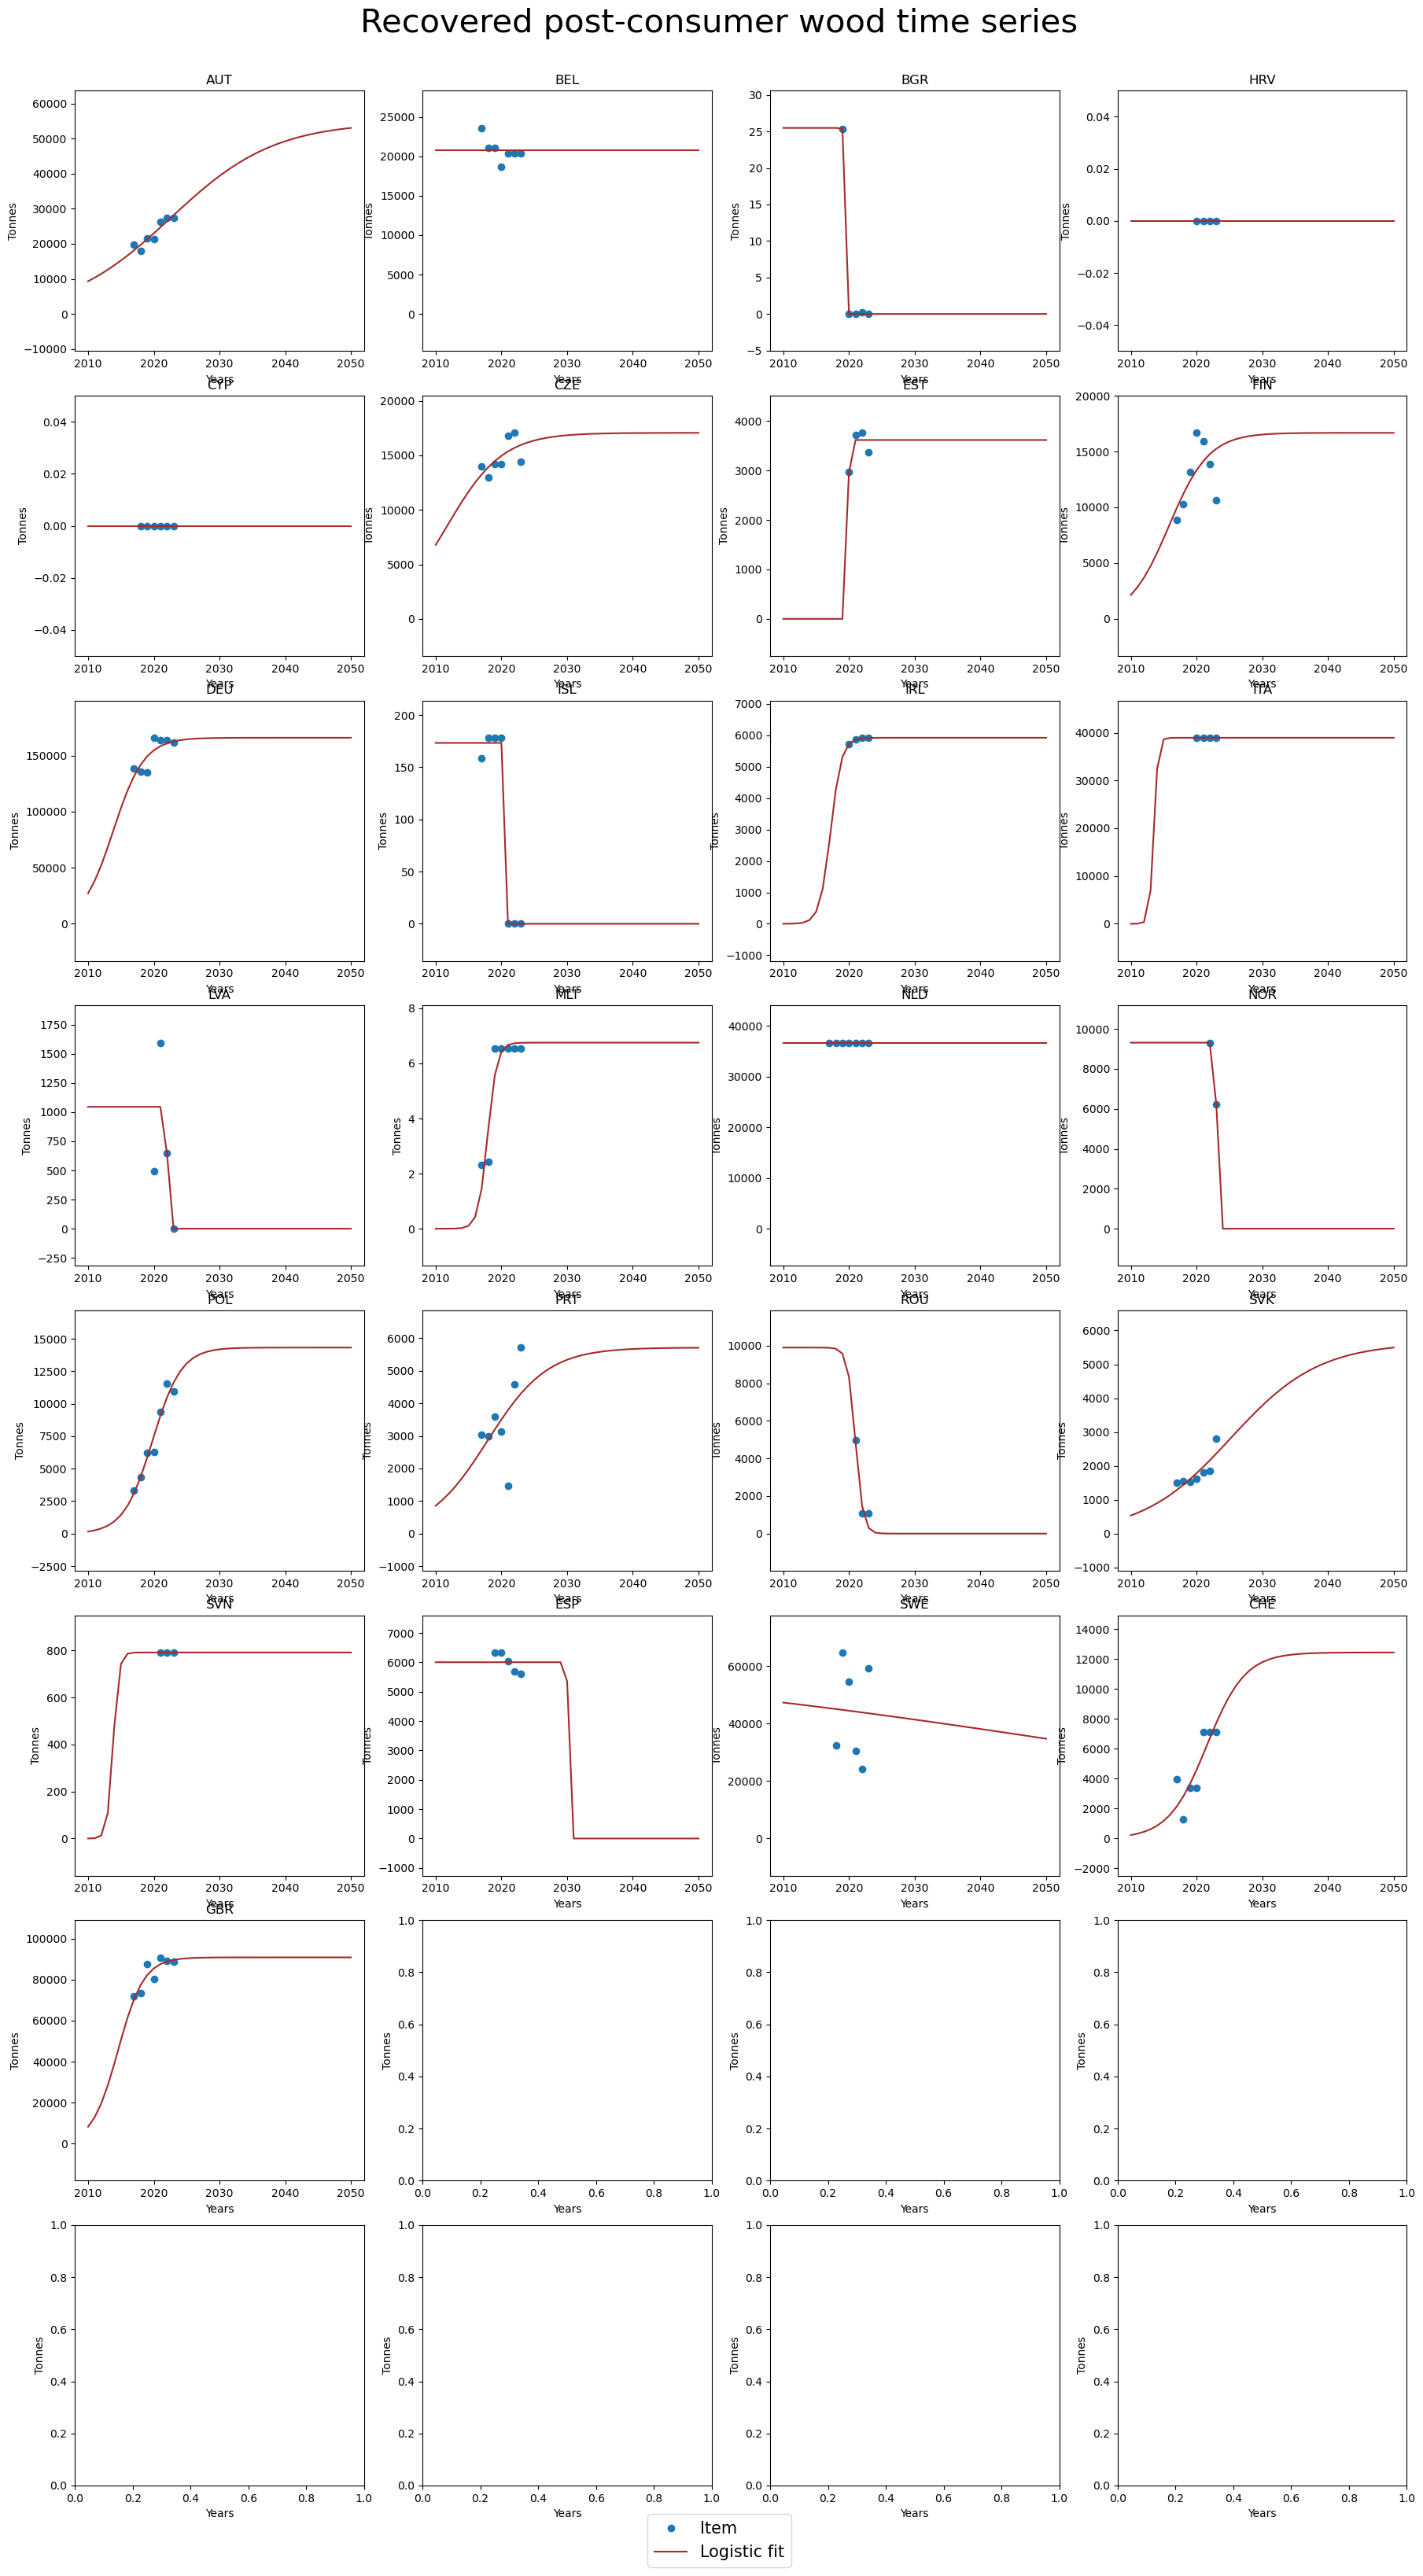

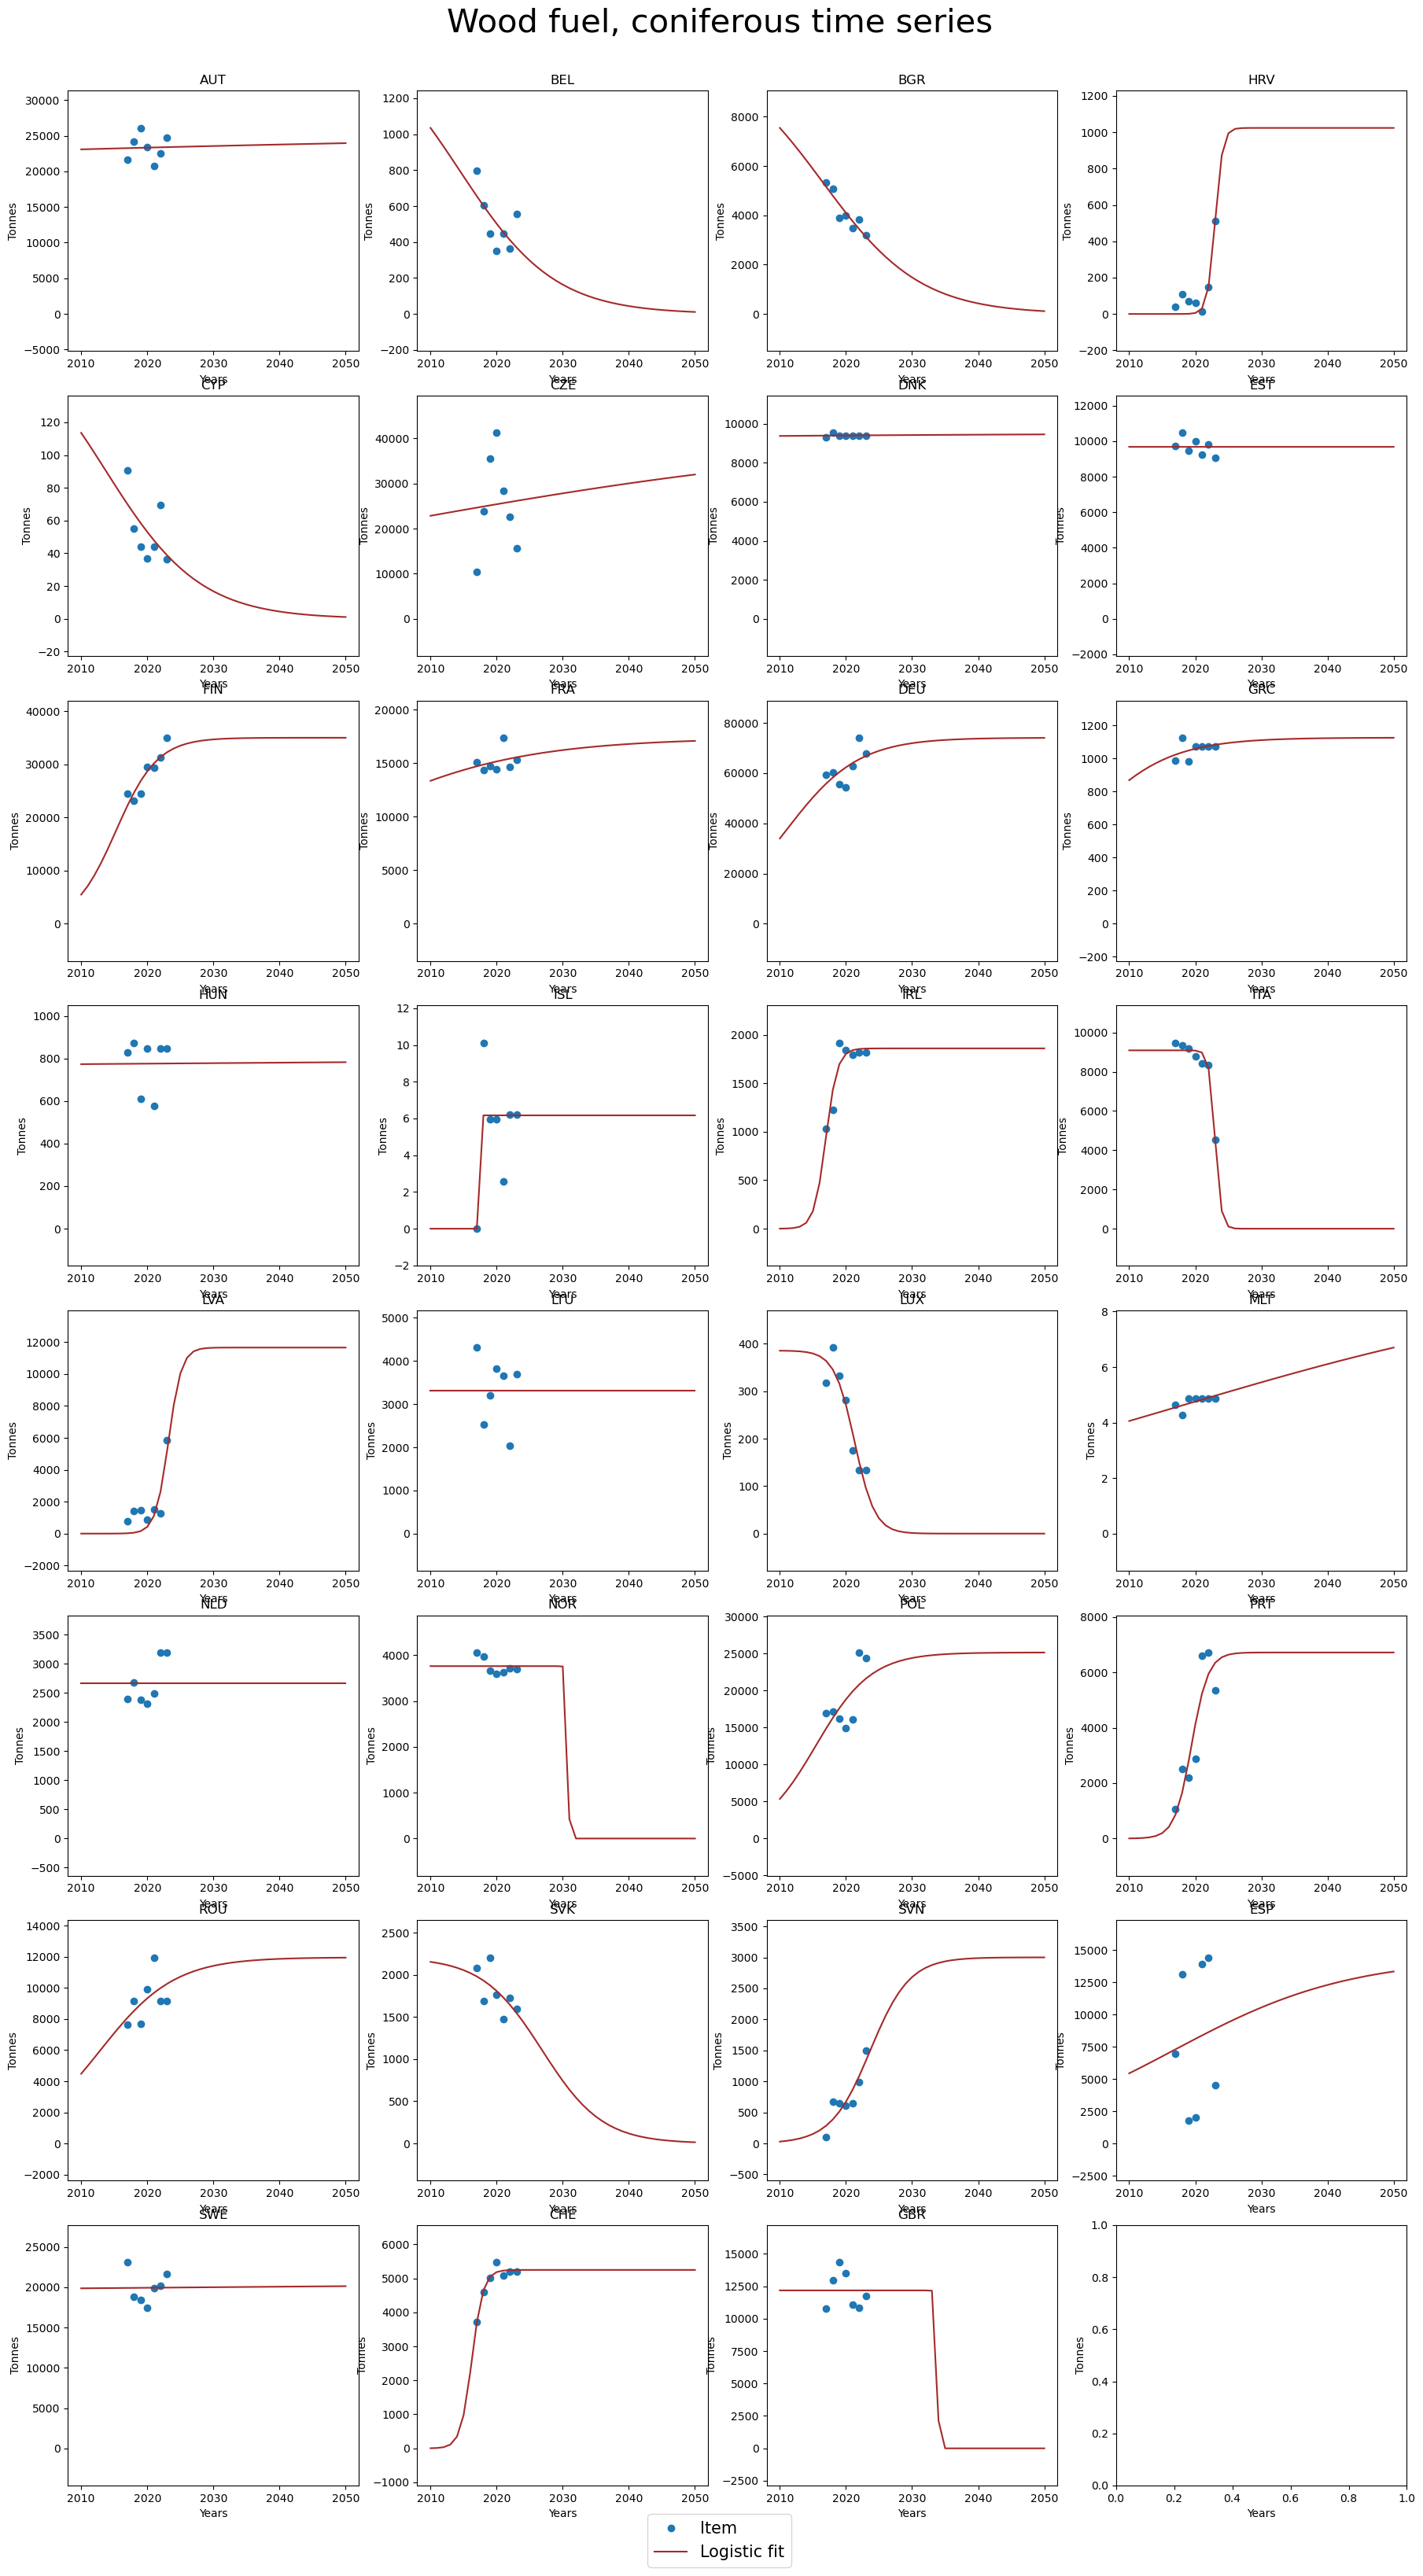

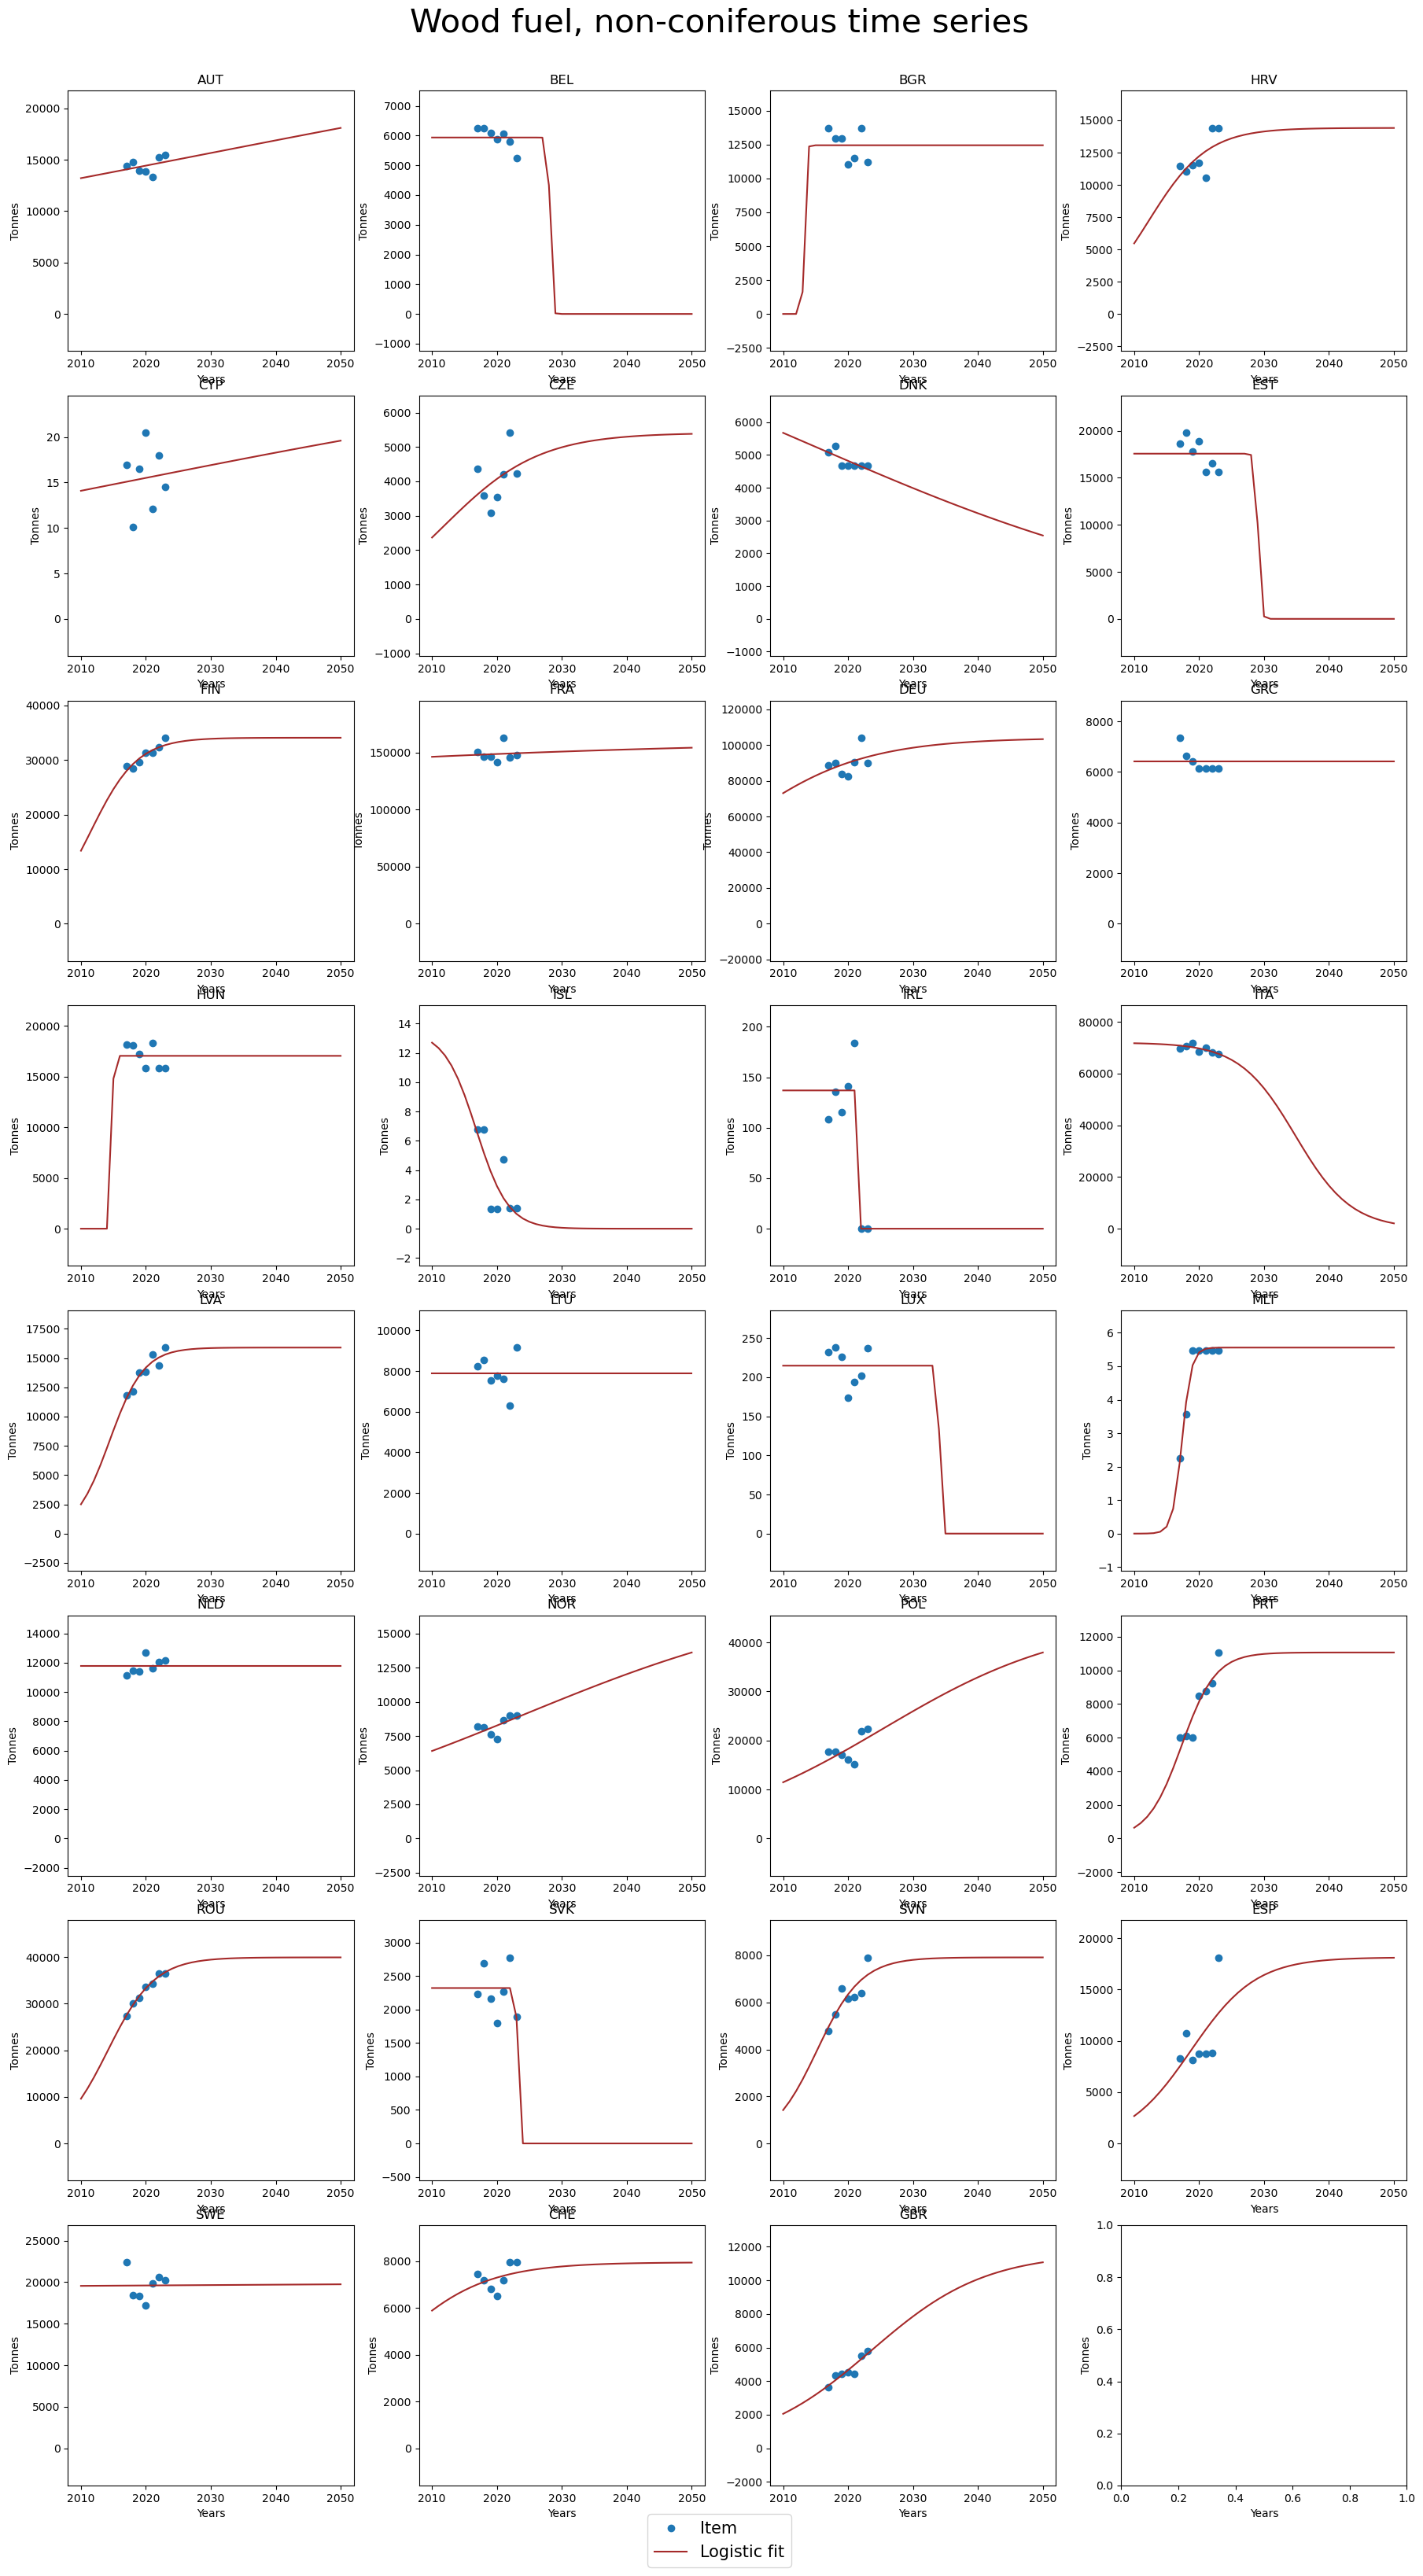

In [45]:
for item in wood_items:
    
    forestry_item = forestry_data.loc[forestry_data['Item']==item]
    fig, axs = plt.subplots(8,4, figsize=(20, 35))
    axs=axs.flatten()
    legend_handles = []
    legend_labels = ['Item','Logistic fit']

    i=0
    for region in forestry_item['LOCATION'].unique():
        reg_data = forestry_item.loc[forestry_item['LOCATION']==region]
        
        lines = axs[i].plot(reg_data['Year'],reg_data['Value'],'o', label='Fuel wood', color = '#1f77b4')
        legend_handles.extend(lines)
        years = np.arange(2010,2051)
        
        #Fit for logistic function
        x0_in = reg_data["Year"].median()

        
        initial_params = [reg_data["Value"].max(), 0.1, x0_in]
        bounds = [(0, reg_data["Value"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]

        results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
        params = results.x
        
        lines = axs[i].plot(years,prediction(params, years),'-', label='Logistic fit', color = 'brown')
        legend_handles.extend(lines)

        #Setting limits of y axis
        #y_min = min(prediction(params, years).min(), reg_data['Value'].min())
        y_min = 0
        y_max = max(prediction(params, years).max(), reg_data['Value'].max())
        padding = (y_max - y_min) * 0.2  
        axs[i].set_ylim(y_min - padding, y_max + padding)

        axs[i].set_title(region)

        i+=1
    
    # Adjust layout to make space for legend and heading
    plt.tight_layout(rect=[0, 0, 0.9, 0.93])

    # Set axis labels for subplots
    for ax in axs:
        ax.set_xlabel('Years')
        ax.set_ylabel('Tonnes')

    # Add a common legend below the subplots
    fig.subplots_adjust(bottom=0.05)
    legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
    legend_subplot.axis('off')
    legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

    #Add title for the entire figure
    title = fig.suptitle(item+' time series', fontsize=30)
    title.set_position([0.45, 0.95])

    plt.show()

### Agricultural Waste

Agricultural waste does not show any correlation with any of the drivers - Population or GDP. 
Hence we do a time-series regression analysis for BAU scenario.

11


/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/3572376214.py:40: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})


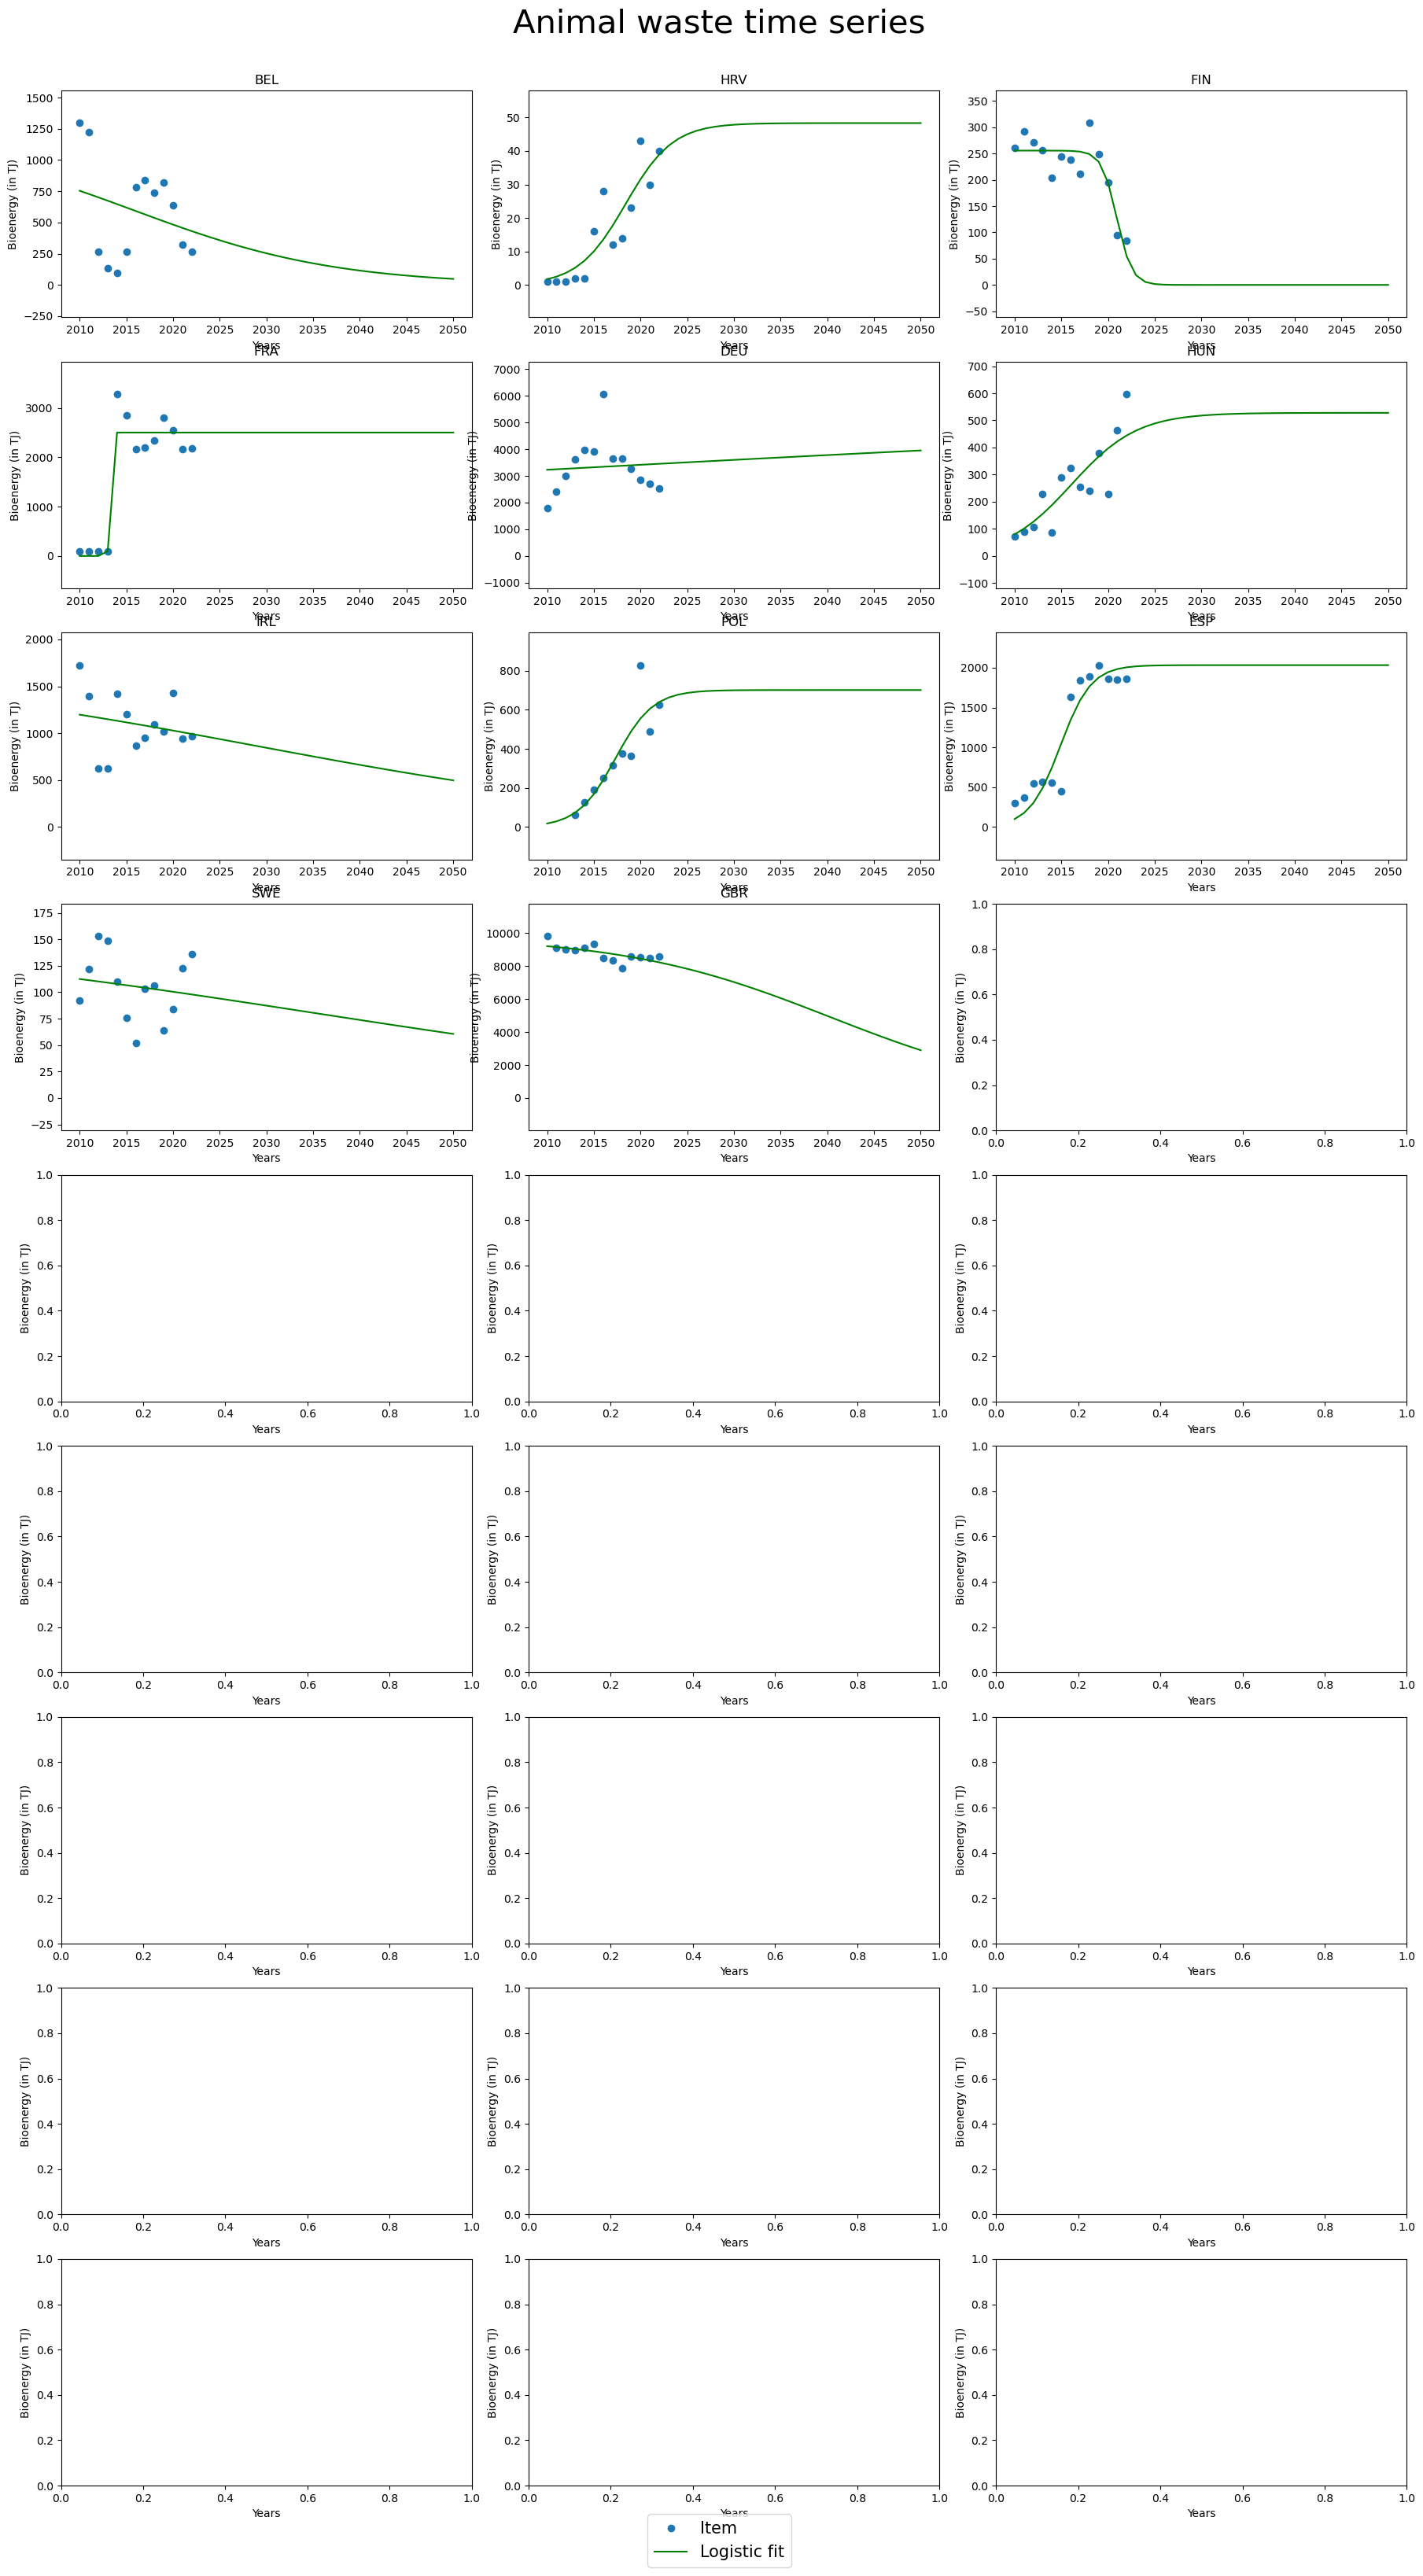

26


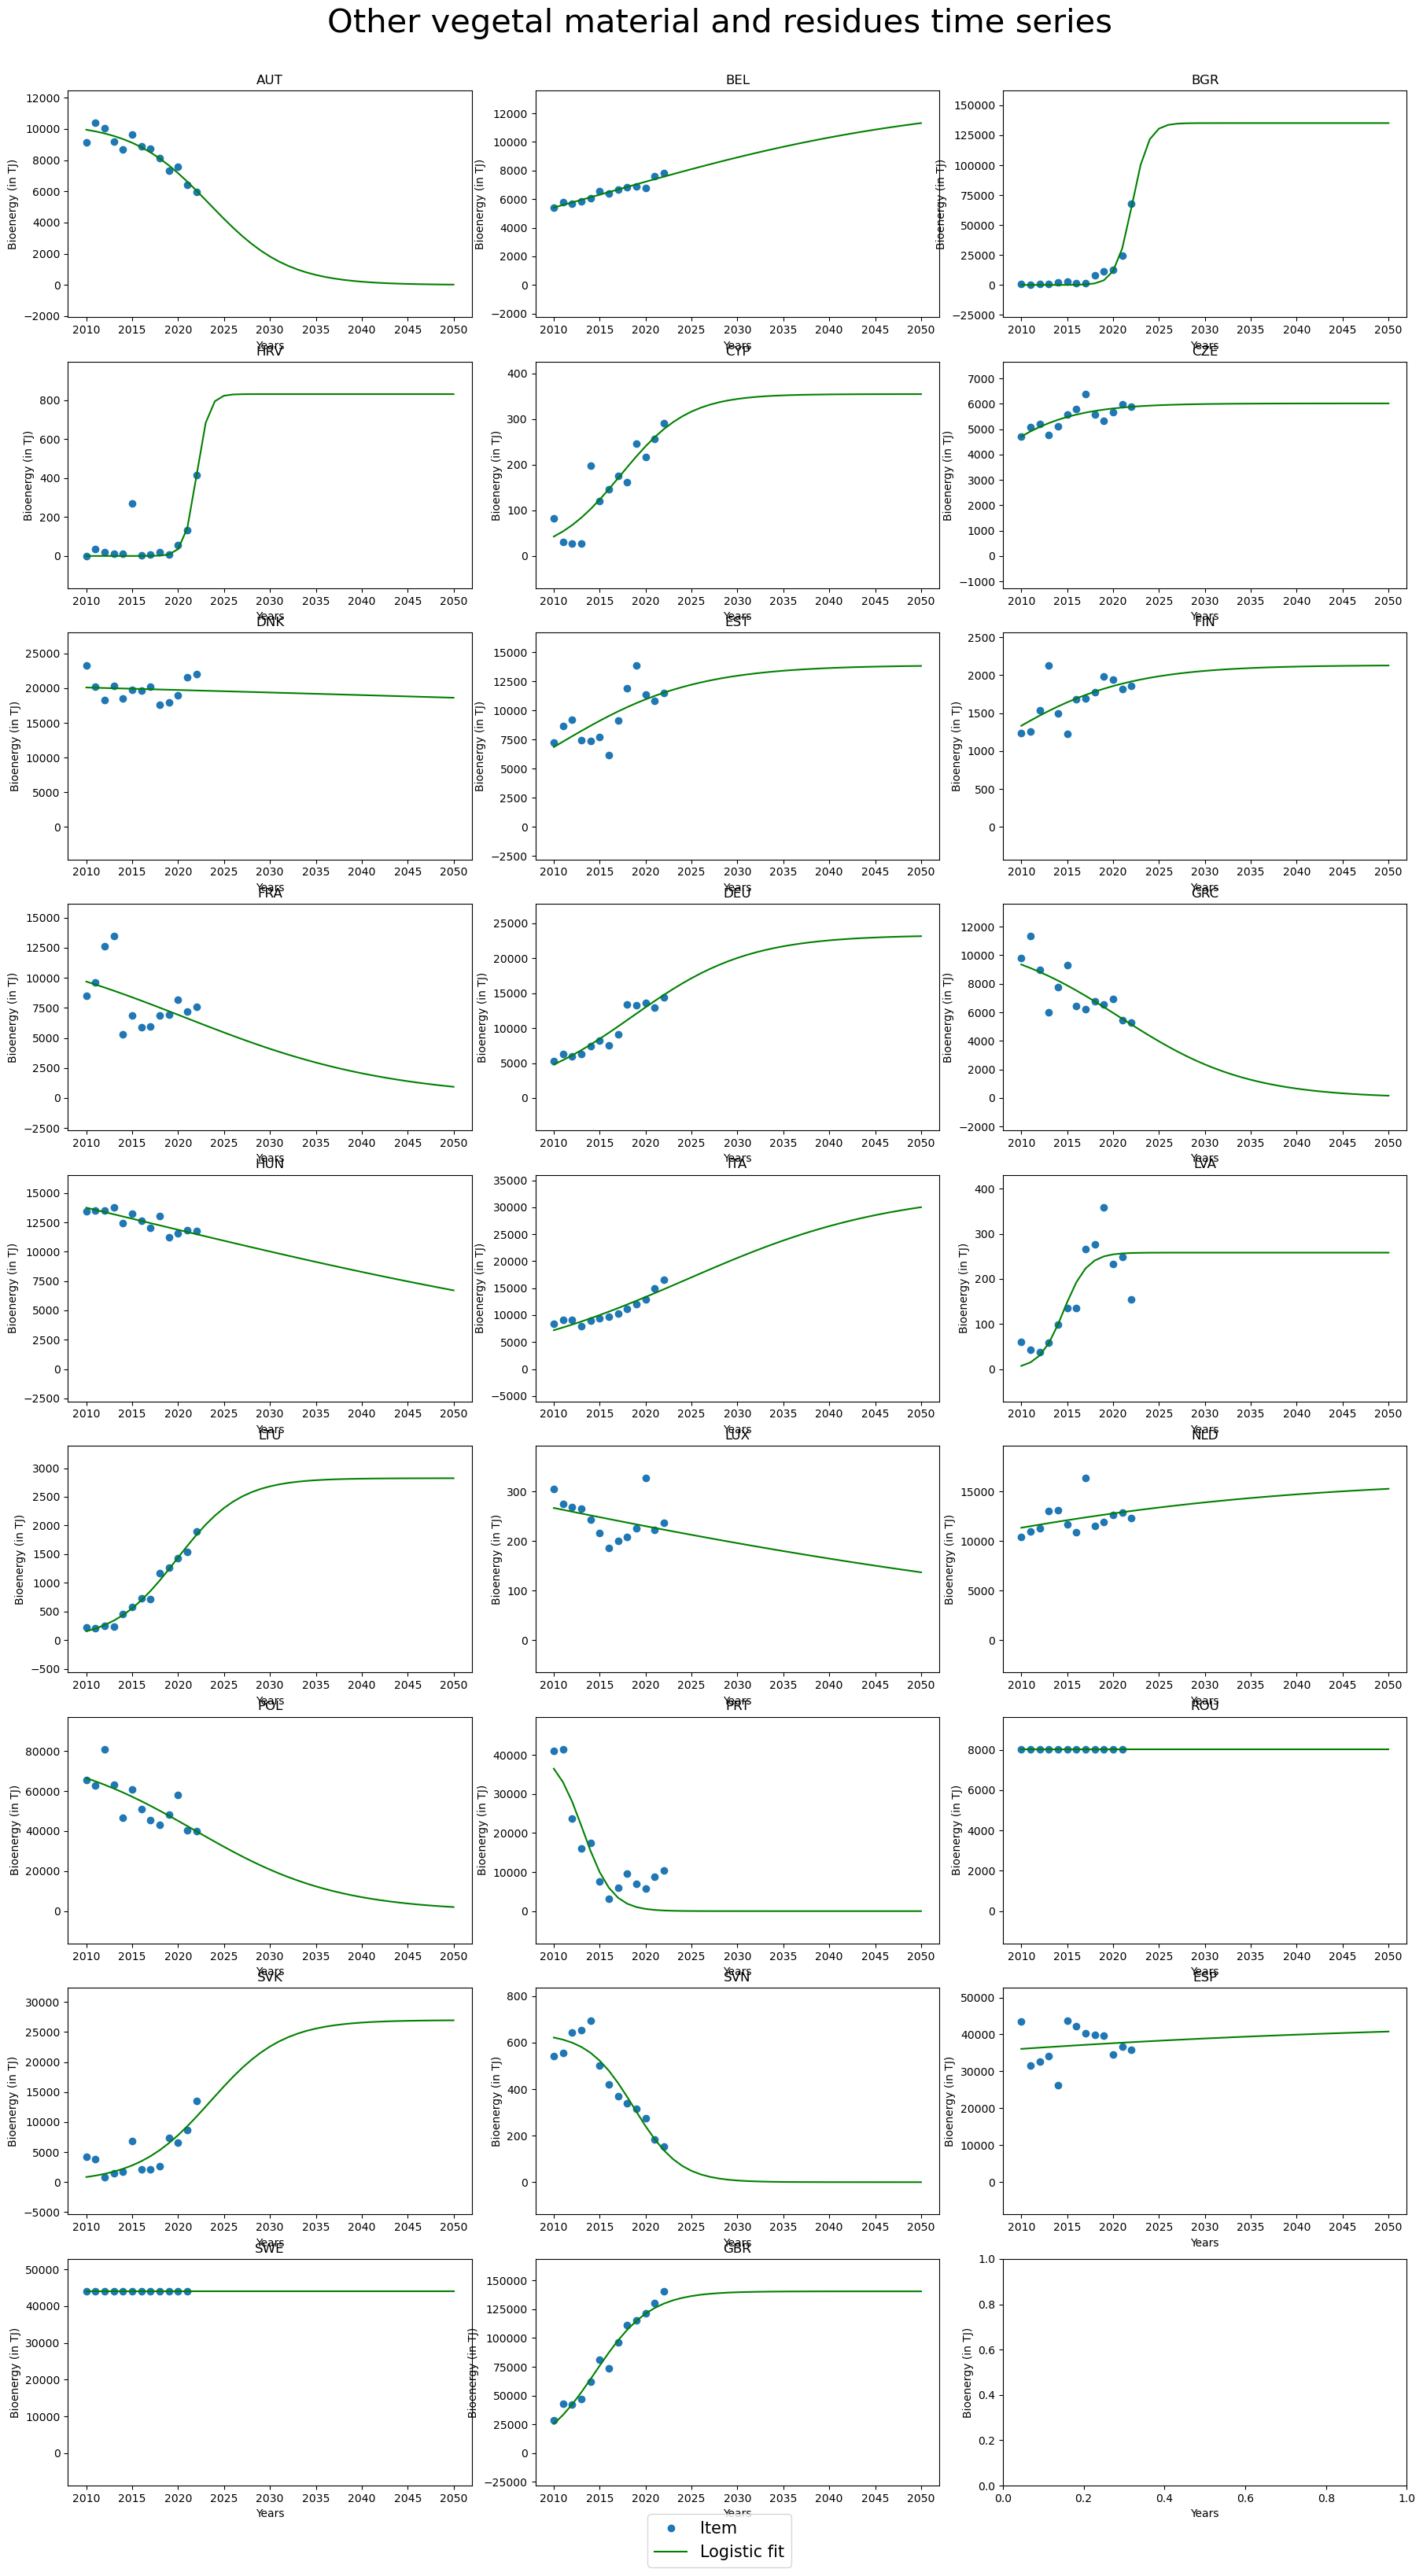

In [46]:
for item in agri_waste:
    
    fao_data_item = fao_data_agri.loc[fao_data_agri['Item']==item]
    
    fig, axs = plt.subplots(9,3, figsize=(20, 35))
    axs=axs.flatten()
    legend_handles = []

    i=0
    print(len(fao_data_item['LOCATION'].unique()))
    legend_labels = ['Item','Logistic fit']

    for region in fao_data_item['LOCATION'].unique():
        reg_data = fao_data_item.loc[fao_data_item['LOCATION']==region]
        
        lines = axs[i].plot(reg_data['Year'],reg_data['Value'],'o', label=item, color = '#1f77b4')
        legend_handles.extend(lines)
        years = np.arange(2010,2051)
    
        #Fit for logistic function
    
        x0_in = reg_data["Year"].median()
        if region in ['HUN','BEL']:
        
            L_in = reg_data["Value"].median()*2
            initial_params = [L_in, 0.1, x0_in]

            # Bounds for minimization
            bounds = [(L_in*0.9, L_in*1.1), (-np.inf,np.inf), (x0_in-0.1, x0_in+0.1)]

        else:
            initial_params = [reg_data["Value"].max(), 0.1, x0_in]
            bounds = [(0, reg_data["Value"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]


        #initial_params = [reg_data["Value"].max(), 0.1, reg_data["Year"].median()]
        # Bounds for minimization
        #bounds = [(-np.inf, reg_data['Value'].max()*1.5), (-np.inf, np.inf), (-np.inf, np.inf)]

        results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
        params = results.x
        lines = axs[i].plot(years,prediction(params, years),'-', label='Logistic fit', color = 'green')
        legend_handles.extend(lines)
        #Setting limits of y axis
        #y_min = min(prediction(params, years).min(), reg_data['Value'].min())
        y_min = 0
        y_max = max(prediction(params, years).max(), reg_data['Value'].max())
        padding = (y_max - y_min) * 0.2  
        axs[i].set_ylim(y_min - padding, y_max + padding)

        axs[i].set_title(region)

        i+=1

    # Adjust layout to make space for legend and heading
    plt.tight_layout(rect=[0, 0, 0.9, 0.93])

    # Set axis labels for subplots
    for ax in axs:
        ax.set_xlabel('Years')
        ax.set_ylabel('Bioenergy (in TJ)')

    # Add a common legend below the subplots
    fig.subplots_adjust(bottom=0.05)
    legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
    legend_subplot.axis('off')
    legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

    # Add title for the entire figure
    title = fig.suptitle(item+' time series', fontsize=30)
    title.set_position([0.45, 0.95])

    plt.show()

### Paper

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/1513642398.py:21: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/1513642398.py:32: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(y_min - padding, y_max + padding)


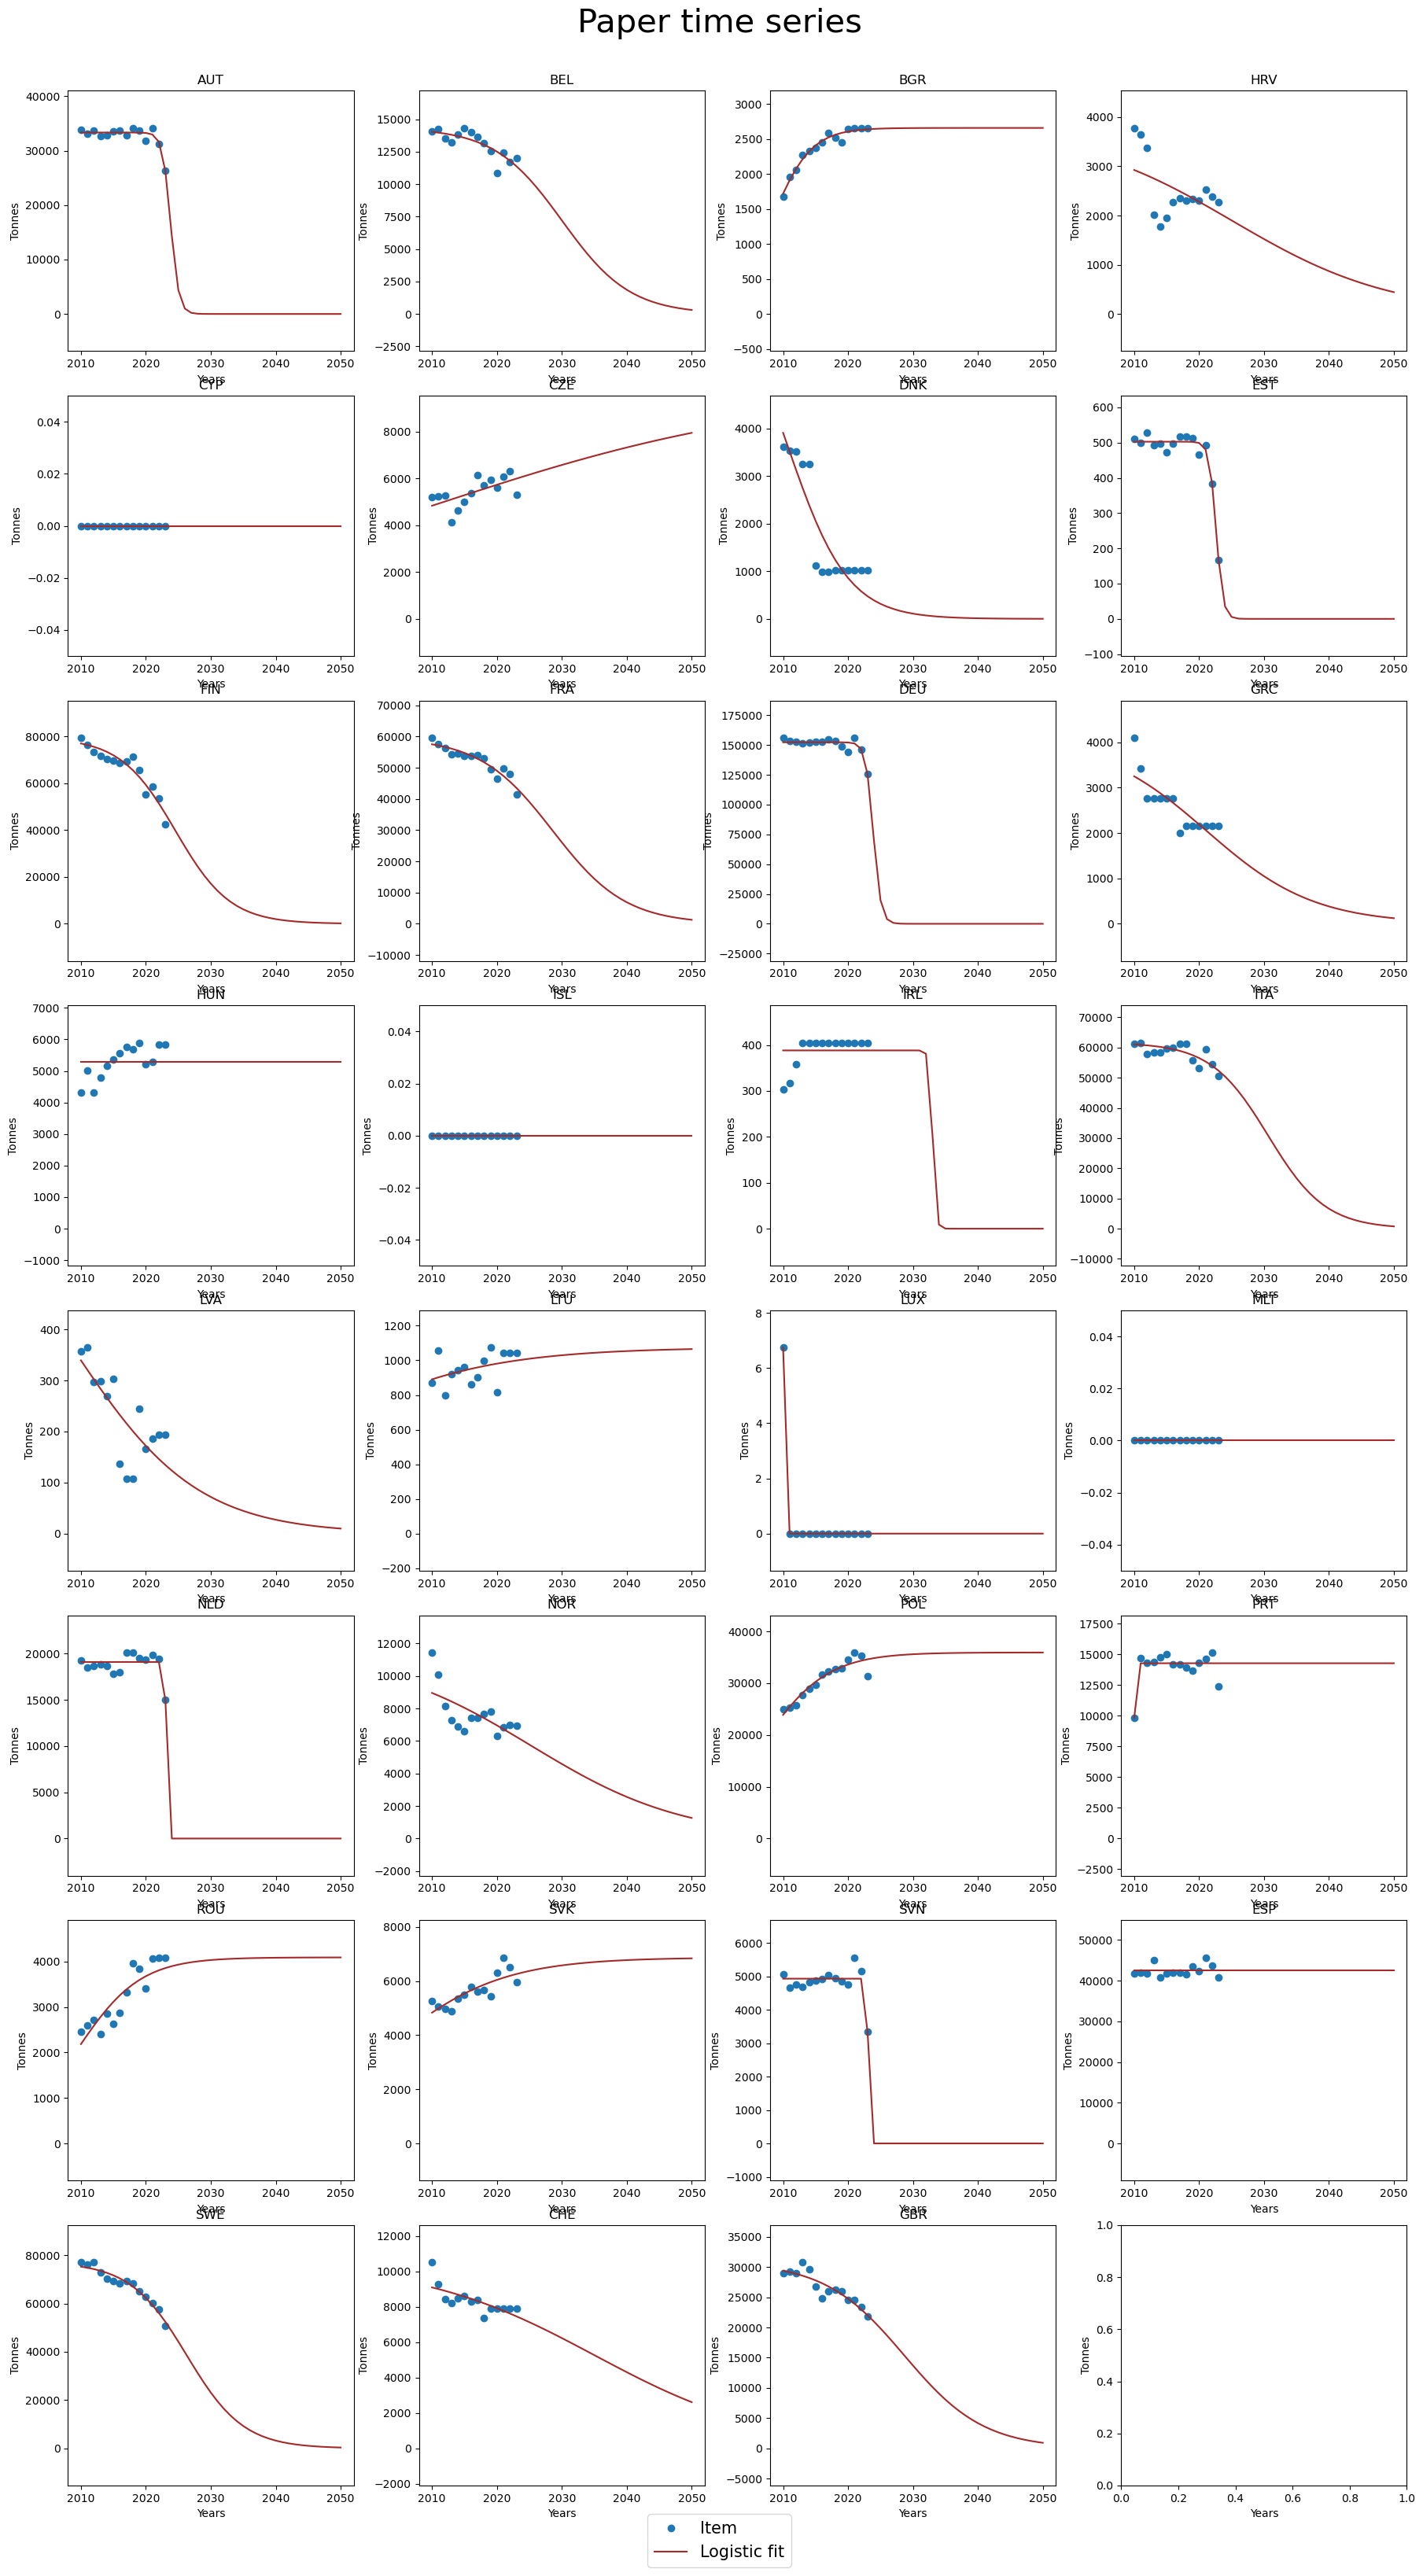

In [47]:

fig, axs = plt.subplots(8,4, figsize=(20, 35))
axs=axs.flatten()
legend_handles = []
legend_labels = ['Item','Logistic fit']

i=0
for region in paper_data['LOCATION'].unique():
    reg_data = paper_data.loc[paper_data['LOCATION']==region]
    
    lines = axs[i].plot(reg_data['Year'],reg_data['Value'],'o', label='Paper', color = '#1f77b4')
    legend_handles.extend(lines)
    years = np.arange(2010,2051)
    
    #Fit for logistic function
    x0_in = reg_data["Year"].median()

    
    initial_params = [reg_data["Value"].max(), 0.1, x0_in]
    bounds = [(0, reg_data["Value"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]

    results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
    params = results.x
    
    lines = axs[i].plot(years,prediction(params, years),'-', label='Logistic fit', color = 'brown')
    legend_handles.extend(lines)

    #Setting limits of y axis
    #y_min = min(prediction(params, years).min(), reg_data['Value'].min())
    y_min = 0
    y_max = max(prediction(params, years).max(), reg_data['Value'].max())
    padding = (y_max - y_min) * 0.2  
    axs[i].set_ylim(y_min - padding, y_max + padding)

    axs[i].set_title(region)

    i+=1

# Adjust layout to make space for legend and heading
plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Set axis labels for subplots
for ax in axs:
    ax.set_xlabel('Years')
    ax.set_ylabel('Tonnes')

# Add a common legend below the subplots
fig.subplots_adjust(bottom=0.05)
legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
legend_subplot.axis('off')
legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

#Add title for the entire figure
title = fig.suptitle('Paper time series', fontsize=30)
title.set_position([0.45, 0.95])

plt.show()

# Converting to ash

## Data format

In [50]:
# Waste codes for Wood
ba_wood_code = '10 01 01_B'
fa_wood_code = '10 01 03'
#ba/fa ratios
#ratio of BA to FA is 1.7:1 (based on UK biomass data)
ba_wood_ratio = 1.7/2.7
fa_wood_ratio = 1/2.7

wood_con_f = pd.read_csv('data/wood_ash_content.csv')

In [51]:
#waste codes
ba_agri_code = '10 01 15_A'
fa_agri_code = '10 01 17_A'
ba_animal_w_code = '10 01 15_B'
fa_animal_w_code = '10 01 17_B'
#ratio of BA to FA is 1.7:1 (based on UK biomass data)
#conversion factors from tons of dry biomass to ash generated
ba_agri_con_f = 0.07*(1.7/2.7)*1000/18.52
fa_agri_con_f = 0.07*(1/2.7)*1000/18.52
ba_animalw_con_f = 0.232*(1.7/2.7)*1000/15.63
fa_animalw_con_f = 0.232*(1/2.7)*1000/15.63

In [52]:
wood_bau_data = pd.DataFrame(columns = ['Waste Stream', 'Location', 'Year', 'Scenario', 'Substance_main_parent',
       'additionalSpecification', 'Stock/Flow ID', 'Value', 'Unit',
       'Data Quality', 'Reference', 'Remark 1 (Method)', 'Remarks 2',
       'Remark 3 - who put in the data', 'Remark 4'])

In [53]:
agri_bau_data = pd.DataFrame(columns = ['Waste Stream', 'Location', 'Year', 'Scenario', 'Substance_main_parent',
       'additionalSpecification', 'Stock/Flow ID', 'Value', 'Unit',
       'Data Quality', 'Reference', 'Remark 1 (Method)', 'Remarks 2',
       'Remark 3 - who put in the data', 'Remark 4'])

## Wood

In [54]:
for ash_code in np.arange(1,3):
    if ash_code==1:
        code=ba_wood_code
        ratio = ba_wood_ratio
    elif ash_code==2:
        code=fa_wood_code
        ratio = fa_wood_ratio
    for item in wood_items:
    
        forestry_item = forestry_data.loc[forestry_data['Item']==item]
        con_f = ratio * wood_con_f['Utilisation Rate'].loc[wood_con_f['Item']==item].values[0] * wood_con_f['Dry ash content'].loc[wood_con_f['Item']==item].values[0]


    
        for region in forestry_item['LOCATION'].unique():
            
            reg_data = forestry_item.loc[forestry_item['LOCATION']==region]
            reg_data.reset_index(inplace = True)
            
            obs_years = reg_data['Year']
            years = np.arange(2023,2051)

            reg_obs_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
            reg_obs_data['Location']=[region]*len(obs_years)
            reg_obs_data['Substance_main_parent']=[code]*len(obs_years)
            reg_obs_data['Scenario']='OBS'
            reg_obs_data['Data Quality'] = 2
            reg_obs_data['Year']=obs_years
            reg_obs_data['Value'] = reg_data['Value'] * con_f
            wood_bau_data = pd.concat([wood_bau_data, reg_obs_data],ignore_index = True)

            #Fit for logistic function
            x0_in = reg_data["Year"].median()
            
            initial_params = [reg_data["Value"].max(), 0.1, x0_in]
            bounds = [(0, reg_data["Value"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]

            results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
            params = results.x
            
            future_data = prediction(params, years)

            reg_bau_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
            reg_bau_data['Location']=[region]*len(years)
            reg_bau_data['Substance_main_parent']=[code]*len(years)
            reg_bau_data['Scenario']='BAU'
            reg_bau_data['Year']=years
            reg_bau_data['Value'] = future_data * con_f
            reg_bau_data['Data Quality']= 4
            wood_bau_data = pd.concat([wood_bau_data,reg_bau_data],ignore_index = True)

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/601571715.py:38: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/601571715.py:38: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/601571715.py:38: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/601571715.py:38: OptimizeWarning: Unknown solver options: maxfev


In [55]:
wood_bau_data['Stock/Flow ID']= 'SLASH_ashesEnergyProductionGenerated'
wood_bau_data['Waste Stream'] = 'SLASH'
wood_bau_data['Unit'] = 'Mg'


In [56]:
wood_bau_data['Reference']='20231106_Milestone18.docx (sharepoint.com)'
wood_bau_data.loc[wood_bau_data['Scenario']=='BAU','Remark 1 (Method)'] = 'Estimated by Time Series Logistic Regression'
wood_bau_data.loc[wood_bau_data['Scenario']=='OBS','Remark 1 (Method)'] = 'Estimated from FAOSTAT Forestry data and conversion factors'
wood_bau_data['Remark 3 - who put in the data'] = 'Sowmya'

In [57]:
# sum all items
#agri_waste_rows = fao_data[fao_data['Item'].isin(agri_waste)]

wood_sum = (wood_bau_data.groupby(['Location', 'Year','Substance_main_parent','Scenario'], as_index=False)
   .agg({'Value': 'sum',
       'Waste Stream':'first', 
       'Stock/Flow ID':'first', 
       'Unit':'first' ,
       'additionalSpecification':'first',
       'Data Quality':'first',
       'Reference':'first', 'Remark 1 (Method)':'first', 'Remarks 2':'first',
      'Remark 3 - who put in the data':'first', 'Remark 4':'first'})
)



In [114]:
wood_sum.reset_index(inplace=True, drop=True)

In [116]:
wood_sum=wood_sum[['Waste Stream', 'Location', 'Year', 'Scenario', 'Substance_main_parent',
       'additionalSpecification', 'Stock/Flow ID', 'Value', 'Unit',
       'Data Quality', 'Reference', 'Remark 1 (Method)', 'Remarks 2',
       'Remark 3 - who put in the data', 'Remark 4']]

In [118]:
wood_sum.to_csv('data/Wood_BAU.csv', index = False)

## Agricultural Waste

In [59]:
for item in ['Other vegetal material and residues','Animal waste']:
    fao_data_item = fao_data_agri.loc[fao_data_agri['Item']==item]
    for i in np.arange(1,3):
        if i==1:
            if item=='Other vegetal material and residues':
                code=ba_agri_code
                con_f = ba_agri_con_f
            else:
                code=ba_animal_w_code
                con_f = ba_animalw_con_f

        elif i==2:
            if item=='Other vegetal material and residues':
                code=fa_agri_code
                con_f = fa_agri_con_f
            else:
                code=fa_animal_w_code
                con_f = fa_animalw_con_f
        
        for region in fao_data_item['LOCATION'].unique():
            #Removing 2022 data for SWE since it is an anamoly indicating a potential error in the data entry for the year
            #No error detected upon disaggregation so commenting this code below
            # if region == 'SWE':
            #    reg_data = fao_data_agri.loc[(fao_data_agri['LOCATION']==region)&(fao_data_agri['Year']<=2021)]
            #    reg_data.reset_index(inplace=True)
            #    obs_years = np.arange(2010,2022)
            #    years = np.arange(2022,2051)
            #else:
            reg_data = fao_data_item.loc[fao_data_item['LOCATION']==region]
            reg_data.reset_index(inplace = True)
            obs_years = reg_data['Year']
            years = np.arange(2023,2051)

            reg_obs_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
            reg_obs_data['Location']=[region]*len(obs_years)
            reg_obs_data['Substance_main_parent']=[code]*len(obs_years)
            reg_obs_data['Scenario']='OBS'
            reg_obs_data['Data Quality'] = 2
            reg_obs_data['Year']=obs_years
            reg_obs_data['Value'] = reg_data['Value'] * con_f
            agri_bau_data = pd.concat([agri_bau_data, reg_obs_data],ignore_index = True)

            #Setting initial parameters and bounds depending on countries
            x0_in = reg_data["Year"].median()
            if region in ['HUN','BEL']:
            
                L_in = reg_data["Value"].median()*2
                initial_params = [L_in, 0.1, x0_in]

                # Bounds for minimization
                bounds = [(L_in*0.9, L_in*1.1), (-np.inf,np.inf), (x0_in-0.1, x0_in+0.1)]

            else:
                initial_params = [reg_data["Value"].max(), 0.1, x0_in]
                bounds = [(0, reg_data["Value"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]

            results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
            params = results.x
            
            future_data = prediction(params, years)

            reg_bau_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
            reg_bau_data['Location']=[region]*len(years)
            reg_bau_data['Substance_main_parent']=[code]*len(years)
            reg_bau_data['Scenario']='BAU'
            reg_bau_data['Year']=years
            reg_bau_data['Value'] = future_data * con_f
            reg_bau_data['Data Quality']= 4
            agri_bau_data = pd.concat([agri_bau_data,reg_bau_data],ignore_index = True)

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/492257670.py:57: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/492257670.py:57: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/492257670.py:57: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/492257670.py:57: OptimizeWarning: Unknown solver options: maxfev


In [60]:
agri_bau_data['Stock/Flow ID']= 'SLASH_ashesEnergyProductionGenerated'
agri_bau_data['Waste Stream'] = 'SLASH'
agri_bau_data['Unit'] = 'Mg'
agri_bau_data['Reference']='20231106_Milestone18.docx (sharepoint.com)'
agri_bau_data.loc[wood_bau_data['Scenario']=='BAU','Remark 1 (Method)'] = 'Estimated by Time Series Logistic Regression'
agri_bau_data.loc[wood_bau_data['Scenario']=='OBS','Remark 1 (Method)'] = 'Estimated from FAOSTAT Bioenergy data and conversion factors'
agri_bau_data['Remark 3 - who put in the data'] = 'Sowmya'

In [61]:
agri_bau_data.to_csv('data/Agri_Animal_Waste_BAU.csv', index = False)

## Paper

In [104]:
# Waste codes for Wood
ba_paper_code = '10 01 15_P'
fa_paper_code = '10 01 17_P'
#ba/fa ratios
#ratio of BA to FA is 1.7:1 (based on UK biomass data)
ba_paper_conf = 1.7/2.7 *0.54*0.25* 50/1000
fa_paper_conf = 1/2.7 *0.54*0.25* 50/1000

In [105]:
paper_bau_data = pd.DataFrame(columns = ['Waste Stream', 'Location', 'Year', 'Scenario', 'Substance_main_parent',
       'additionalSpecification', 'Stock/Flow ID', 'Value', 'Unit',
       'Data Quality', 'Reference', 'Remark 1 (Method)', 'Remarks 2',
       'Remark 3 - who put in the data', 'Remark 4'])

In [106]:
for ash_code in np.arange(1,3):
    if ash_code==1:
        code=ba_paper_code
        ratio = ba_paper_conf
    elif ash_code==2:
        code=fa_paper_code
        con_f = fa_paper_conf


    
    for region in paper_data['LOCATION'].unique():
        
        reg_data = paper_data.loc[paper_data['LOCATION']==region]
        reg_data.reset_index(inplace = True)
        
        obs_years = reg_data['Year']
        years = np.arange(2023,2051)

        reg_obs_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
        reg_obs_data['Location']=[region]*len(obs_years)
        reg_obs_data['Substance_main_parent']=[code]*len(obs_years)
        reg_obs_data['Scenario']='OBS'
        reg_obs_data['Data Quality'] = 2
        reg_obs_data['Year']=obs_years
        reg_obs_data['Value'] = reg_data['Value'] * con_f
        paper_bau_data = pd.concat([paper_bau_data, reg_obs_data],ignore_index = True)

        #Fit for logistic function
        x0_in = reg_data["Year"].median()
        
        initial_params = [reg_data["Value"].max(), 0.1, x0_in]
        bounds = [(0, reg_data["Value"].max()*2), (-np.inf,np.inf), (-np.inf, np.inf)]

        results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
        params = results.x
        
        future_data = prediction(params, years)

        reg_bau_data = pd.DataFrame(columns = ['Location', 'Year','Scenario','Substance_main_parent','Value','Unit','Data Quality'])
        reg_bau_data['Location']=[region]*len(years)
        reg_bau_data['Substance_main_parent']=[code]*len(years)
        reg_bau_data['Scenario']='BAU'
        reg_bau_data['Year']=years
        reg_bau_data['Value'] = future_data * con_f
        reg_bau_data['Data Quality']= 4
        paper_bau_data = pd.concat([paper_bau_data,reg_bau_data],ignore_index = True)

/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/848542628.py:34: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/848542628.py:34: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/848542628.py:34: OptimizeWarning: Unknown solver options: maxfev
  results = minimize(objective, initial_params, args=(reg_data["Year"].to_numpy(), reg_data["Value"].to_numpy()), bounds = bounds, options ={ 'maxfev': 10000})
/var/folders/bm/tmx1rxns5yvdzj8zkylvh57xfl_lm7/T/ipykernel_60018/848542628.py:34: OptimizeWarning: Unknown solver options: maxfev


In [107]:
paper_bau_data['Stock/Flow ID']= 'SLASH_ashesEnergyProductionGenerated'
paper_bau_data['Waste Stream'] = 'SLASH'
paper_bau_data['Unit'] = 'Mg'

In [108]:
paper_bau_data['Reference']='20231106_Milestone18.docx (sharepoint.com)'
paper_bau_data.loc[wood_bau_data['Scenario']=='BAU','Remark 1 (Method)'] = 'Estimated by Time Series Logistic Regression'
paper_bau_data.loc[wood_bau_data['Scenario']=='OBS','Remark 1 (Method)'] = 'Estimated from FAOSTAT data and conversion factors'
paper_bau_data['Remark 3 - who put in the data'] = 'Sowmya'

In [109]:
paper_bau_data.to_csv('data/Paper_BAU.csv', index = False)

# Plot final

In [85]:
def plot_final(df,labels):

    for code in df['Substance_main_parent'].unique():
        code_data = df[df['Substance_main_parent']==code]
        fig, axs = plt.subplots(8, 4, figsize=(20, 35))
        axs=axs.flatten()
        legend_handles = []
        legend_labels = labels
        i=0
        for region in code_data['Location'].unique():
            reg_data = code_data.loc[code_data['Location']==region]
            obs=reg_data.loc[reg_data['Scenario']=='OBS']
            bau=reg_data.loc[reg_data['Scenario']=='BAU']
            lines = axs[i].plot(obs['Year'],obs['Value'],'o', label=legend_labels[0], color = '#1f77b4')
            legend_handles.extend(lines)

            lines = axs[i].plot(bau['Year'],bau['Value'],'-', label=legend_labels[1], color = 'green')
            legend_handles.extend(lines)



            #Setting limits of y axis
            y_min = 0
            y_max = max(bau['Value'].max(),obs['Value'].max())
            padding = (y_max - y_min) * 0.2  
            axs[i].set_ylim(y_min - padding, y_max + padding)

            axs[i].set_title(region)

            i+=1

            # Adjust layout to make space for legend and heading
            plt.tight_layout(rect=[0, 0, 0.9, 0.93])

            # Set axis labels for subplots
            for ax in axs:
                ax.set_xlabel('Year')
                ax.set_ylabel('Tons')

            # Add a common legend below the subplots
            fig.subplots_adjust(bottom=0.05)
            legend_subplot = fig.add_axes([0.1, 0.02, 0.7, 0.02])  
            legend_subplot.axis('off')
            legend_subplot.legend(legend_handles,legend_labels, loc='center', fontsize=15)

        # Add title for the entire figure
        title = fig.suptitle(code, fontsize=30)
        title.set_position([0.45, 0.95])

        plt.show()

In [87]:
#plot_final(wood_sum,['Wood Ash OBS','Wood Ash BAU'])

In [88]:
#plot_final(agri_bau_data,['OBS','BAU'])

In [111]:
#plot_final(paper_bau_data,['OBS','BAU'])